In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import roc_auc_score

# Application Train Datasets


## Function to reduce the memory usage of a dataframe

In [4]:
def reduce_memory_usage(df):
  start_mem = df.memory_usage().sum() / 1024 ** 2
  print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
  
  for col in df.columns:
    col_type = df[col].dtype

    if col_type != object:
      c_min = df[col].min()
      c_max = df[col].max()
      if str(col_type)[:3] == 'int':
        if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
          df[col] = df[col].astype(np.int8)
        elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int8).max:
          df[col] = df[col].astype(np.int16)
        elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int8).max:
          df[col] = df[col].astype(np.int32)
        elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int8).max:
          df[col] = df[col].astype(np.int64)
      else:
        if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max: 
          df[col] = df[col].astype(np.float16)
        elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float16).max: 
          df[col] = df[col].astype(np.float32)
        else:
          df[col] = df[col].astype(np.float64)

  end_mem = df.memory_usage().sum() / 1024**2
  print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
  print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

  return df

## Basic Overview of the Train Data

In [5]:
train = reduce_memory_usage(pd.read_csv("../content/drive/MyDrive/Virtual Internship - Home Credit/input/application_train.csv"))
print('Number of data points : ',train.shape[0])
print('Number of features : ',train.shape[1])
train.head()

Memory usage of dataframe is 286.23 MB
Memory usage after optimization is: 99.42 MB
Decreased by 65.3%
Number of data points :  307511
Number of features :  122


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
print('Features : ', train.columns.values)

Features :  ['SK_ID_CURR' 'TARGET' 'NAME_CONTRACT_TYPE' 'CODE_GENDER' 'FLAG_OWN_CAR'
 'FLAG_OWN_REALTY' 'CNT_CHILDREN' 'AMT_INCOME_TOTAL' 'AMT_CREDIT'
 'AMT_ANNUITY' 'AMT_GOODS_PRICE' 'NAME_TYPE_SUITE' 'NAME_INCOME_TYPE'
 'NAME_EDUCATION_TYPE' 'NAME_FAMILY_STATUS' 'NAME_HOUSING_TYPE'
 'REGION_POPULATION_RELATIVE' 'DAYS_BIRTH' 'DAYS_EMPLOYED'
 'DAYS_REGISTRATION' 'DAYS_ID_PUBLISH' 'OWN_CAR_AGE' 'FLAG_MOBIL'
 'FLAG_EMP_PHONE' 'FLAG_WORK_PHONE' 'FLAG_CONT_MOBILE' 'FLAG_PHONE'
 'FLAG_EMAIL' 'OCCUPATION_TYPE' 'CNT_FAM_MEMBERS' 'REGION_RATING_CLIENT'
 'REGION_RATING_CLIENT_W_CITY' 'WEEKDAY_APPR_PROCESS_START'
 'HOUR_APPR_PROCESS_START' 'REG_REGION_NOT_LIVE_REGION'
 'REG_REGION_NOT_WORK_REGION' 'LIVE_REGION_NOT_WORK_REGION'
 'REG_CITY_NOT_LIVE_CITY' 'REG_CITY_NOT_WORK_CITY'
 'LIVE_CITY_NOT_WORK_CITY' 'ORGANIZATION_TYPE' 'EXT_SOURCE_1'
 'EXT_SOURCE_2' 'EXT_SOURCE_3' 'APARTMENTS_AVG' 'BASEMENTAREA_AVG'
 'YEARS_BEGINEXPLUATATION_AVG' 'YEARS_BUILD_AVG' 'COMMONAREA_AVG'
 'ELEVATORS_AVG' 'ENTRANCES

## Application Train Data Analysis

In [7]:
app_train = train.copy()

In [8]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### Function to plot Univariate Bar Plot

In [9]:
app_train_target = train.copy()

In [10]:
app_train_target.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
app_train_target['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [12]:
decode_map = {0: "No Payment Difficulties", 1: "Payment Difficulties"}
def decode_sentiment(label):
    return decode_map[int(label)]

app_train_target['TARGET'] = app_train_target['TARGET'].apply(lambda x: decode_sentiment(x))

In [13]:
from pandas._libs.lib import fast_unique_multiple_list_gen
def univariate_plt(data, col1, col2='TARGET'):
  plt.figure(figsize=(10,5))
  fig = sns.countplot(x=col1, data = app_train_target, hue = 'TARGET', palette = 'ch:start=0.3,rot=-.2_r' )
  plt.title('Customers Repayment Abilities By %s' %col1, fontweight='bold')
  plt.ylabel('Loans')
  plt.show()

In [14]:
pd.set_option('display.max_rows', None)

def perc(data, col1, col2='TARGET'):
  temp = data.groupby(col1)[col2].agg(lambda x: x.eq(1).sum()).reset_index()
  #temp = app_train[[col1, col2]].groupby([col1], as_index=False).mean().sort_values(by=['TARGET'], ascending=False)
  temp['Percentage'] = data.groupby(col1)[col2].agg(Percentage='mean').reset_index()['Percentage']  
  temp['Total'] = data.groupby(col1)[col2].agg(Total='count').reset_index()['Total']
  temp['Percentage'] = temp['Percentage'] * 100
  temp.sort_values(by='Percentage', inplace=True, ascending=False)
  print('Details of customers who had difficulties to repay the loan on time by %s' %col1)
  return temp

In [15]:
pd.set_option('display.max_rows', None)

def univariate_tbl(data, col1, col2='TARGET', top=False):
  temp = data.groupby([col1, col2], as_index=False)['SK_ID_CURR'].count()
  temp.sort_values(by='SK_ID_CURR', ascending=False)
  if top:
        temp = temp[0:top]
    
  univariate_plt(temp, col1, col2=col2)
  
  return temp

In [16]:
pd.set_option('display.max_rows', None)

def univariate_tb(data, col1, col2='TARGET', top=False):
  temp = data.groupby([col1, col2], as_index=False)['SK_ID_CURR'].count()
  temp.sort_values(by='SK_ID_CURR', ascending=False)
  if top:
        temp = temp[0:top]
  
  return temp

### Univariate Analysis: Target

Number of customers who not repay the loan on time: 24825 , ( 8.072881945686495 % )
Number of customers who repay the loan on time: 282686 , ( 91.92711805431351 % )


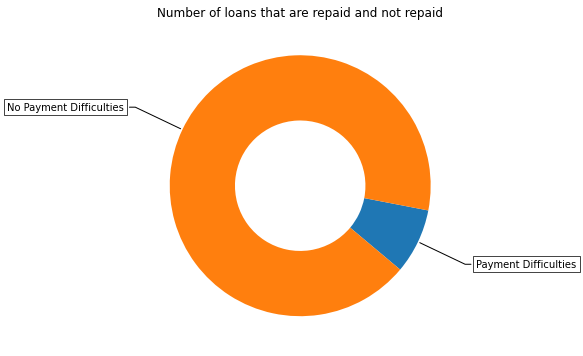

In [17]:
y_value_counts = app_train['TARGET'].value_counts()
print("Number of customers who not repay the loan on time:", y_value_counts[1],", (",(y_value_counts[1]/(y_value_counts[1]+y_value_counts[0]))*100,"% )")
print("Number of customers who repay the loan on time:", y_value_counts[0],", (",(y_value_counts[0]/(y_value_counts[1]+y_value_counts[0]))*100,"% )")

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
recipe = ["Payment Difficulties", "No Payment Difficulties"]

data = [y_value_counts[1], y_value_counts[0]]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5),\
                       startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Number of loans that are repaid and not repaid")

plt.show()

### Univariate Analysis: Name_Contract_Type

In [18]:
perc(app_train,'NAME_CONTRACT_TYPE', 'TARGET')

Details of customers who had difficulties to repay the loan on time by NAME_CONTRACT_TYPE


,NAME_CONTRACT_TYPE,TARGET,Percentage,Total
0,Cash loans,23221,8.345913,278232
1,Revolving loans,1604,5.478329,29279


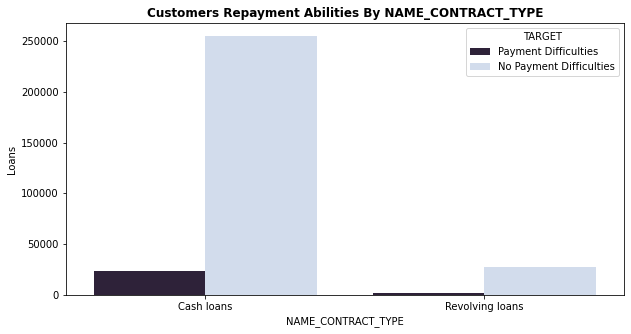

,NAME_CONTRACT_TYPE,TARGET,SK_ID_CURR
0,Cash loans,No Payment Difficulties,255011
1,Cash loans,Payment Difficulties,23221
2,Revolving loans,No Payment Difficulties,27675
3,Revolving loans,Payment Difficulties,1604


In [19]:
univariate_tbl(app_train_target, 'NAME_CONTRACT_TYPE', 'TARGET', False)

**Observations :**
* Most of the people are taking loans in the form of cash loans with around 278K, instead of revolving loans with around 29K.

### Univariate Analysis: Code_Gender

In [20]:
perc(app_train,'CODE_GENDER', 'TARGET')

Details of customers who had difficulties to repay the loan on time by CODE_GENDER


,CODE_GENDER,TARGET,Percentage,Total
1,M,10655,10.141920,105059
0,F,14170,6.999328,202448
2,XNA,0,0.000000,4


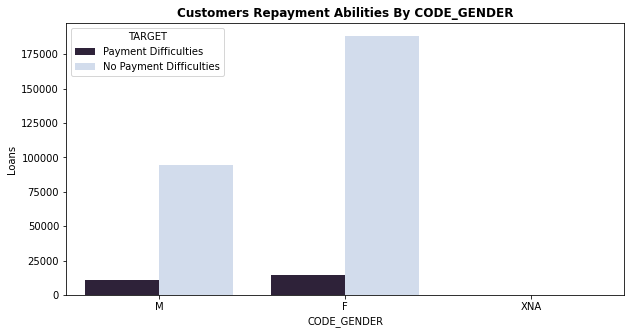

,CODE_GENDER,TARGET,SK_ID_CURR
0,F,No Payment Difficulties,188278
1,F,Payment Difficulties,14170
2,M,No Payment Difficulties,94404
3,M,Payment Difficulties,10655
4,XNA,No Payment Difficulties,4


In [21]:
univariate_tbl(app_train_target, 'CODE_GENDER', 'TARGET', False)

**Observations :**
* The interesting part over here is the fact that **Women took much more number of loans as compared to Men**. Whereas Women took a total of 202K+ loans, Men only took 105K+ loans.
* However, at the same time, **Men are slightly more had the problem of repaying the loan** as compared to Women. Whereas Men are had the problem to repay their loans in 10% of the cases, and Women are had the problem to repay in 7% of the cases.
* There are 4 entries where Gender='XNA'. Since this is not providing us with much information.

### Univariate Analysis: Flag_Own_Car

In [22]:
perc(app_train,'FLAG_OWN_CAR', 'TARGET')

Details of customers who had difficulties to repay the loan on time by FLAG_OWN_CAR


,FLAG_OWN_CAR,TARGET,Percentage,Total
0,N,17249,8.500227,202924
1,Y,7576,7.243730,104587


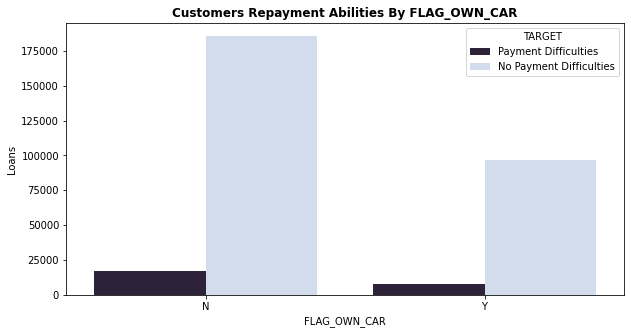

,FLAG_OWN_CAR,TARGET,SK_ID_CURR
0,N,No Payment Difficulties,185675
1,N,Payment Difficulties,17249
2,Y,No Payment Difficulties,97011
3,Y,Payment Difficulties,7576


In [23]:
univariate_tbl(app_train_target, 'FLAG_OWN_CAR', 'TARGET')

**Observations :**
* Most of the applicants for loans do not own a car.
* However, there is not much difference in the loan repayment status for the customer based on this information (8.5% and 7.2% respectively). However, the difference is not very significant.

### Univariate Analysis: Flag Own Realty

In [24]:
perc(app_train,'FLAG_OWN_REALTY', 'TARGET')

Details of customers who had difficulties to repay the loan on time by FLAG_OWN_REALTY


,FLAG_OWN_REALTY,TARGET,Percentage,Total
0,N,7842,8.324929,94199
1,Y,16983,7.961577,213312


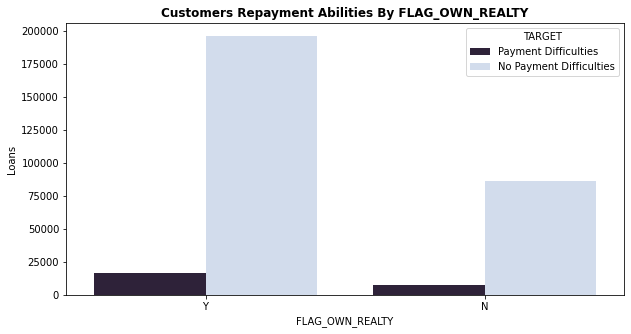

,FLAG_OWN_REALTY,TARGET,SK_ID_CURR
0,N,No Payment Difficulties,86357
1,N,Payment Difficulties,7842
2,Y,No Payment Difficulties,196329
3,Y,Payment Difficulties,16983


In [25]:
univariate_tbl(app_train_target, 'FLAG_OWN_REALTY', 'TARGET')

**Observations :**
* Most of the applicants for loans own a flat/house.
* However, there is not much difference in the loan repayment status for the customer based on this information (7.9% and 8.3% respectively). The difference is not very significant.

### Univariate Analysis: Region_Rating_Client

In [26]:
perc(app_train,'REGION_RATING_CLIENT', 'TARGET')

Details of customers who had difficulties to repay the loan on time by REGION_RATING_CLIENT


,REGION_RATING_CLIENT,TARGET,Percentage,Total
2,3,5366,11.102835,48330
1,2,17907,7.889102,226984
0,1,1552,4.820325,32197


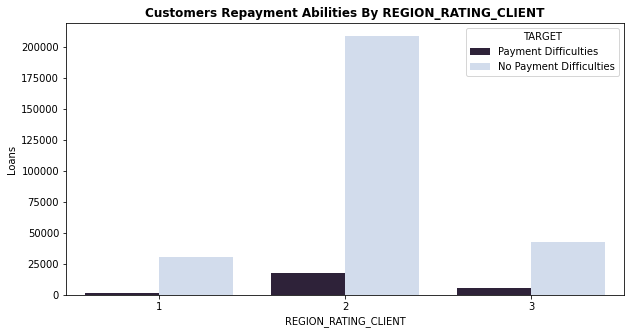

,REGION_RATING_CLIENT,TARGET,SK_ID_CURR
0,1,No Payment Difficulties,30645
1,1,Payment Difficulties,1552
2,2,No Payment Difficulties,209077
3,2,Payment Difficulties,17907
4,3,No Payment Difficulties,42964
5,3,Payment Difficulties,5366


In [27]:
univariate_tbl(app_train_target, 'REGION_RATING_CLIENT', 'TARGET')

**Observations :**
* Most of the applicants for loans own a flat/house.
* However, there is not much difference in the loan repayment status for the customer based on this information (7.9% and 8.3% respectively). The difference is not very significant.

### Univariate Analysis: Cnt_Children

In [28]:
perc(app_train,'CNT_CHILDREN', 'TARGET')

Details of customers who had difficulties to repay the loan on time by CNT_CHILDREN


,CNT_CHILDREN,TARGET,Percentage,Total
9,9,2,100.000000,2
11,11,1,100.000000,1
6,6,6,28.571429,21
4,4,55,12.820513,429
3,3,358,9.631423,3717
1,1,5454,8.923575,61119
2,2,2333,8.721821,26749
5,5,7,8.333333,84
0,0,16609,7.711809,215371
7,7,0,0.000000,7


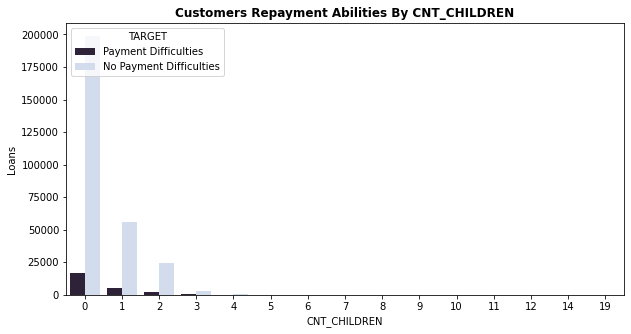

,CNT_CHILDREN,TARGET,SK_ID_CURR
0,0,No Payment Difficulties,198762
1,0,Payment Difficulties,16609
2,1,No Payment Difficulties,55665
3,1,Payment Difficulties,5454
4,2,No Payment Difficulties,24416
5,2,Payment Difficulties,2333
6,3,No Payment Difficulties,3359
7,3,Payment Difficulties,358
8,4,No Payment Difficulties,374
9,4,Payment Difficulties,55


In [29]:
univariate_tbl(app_train_target, 'CNT_CHILDREN', 'TARGET')

**Observations :**
* The applicants having no children take considerably higher number of loans.
* Top 3 of payment difficulties are applicants who having **9 children**, **11 children** and **6 children**. Where 9 and 11 children have 100% but only 2 and 1 applicants of both.

### Univariate Analysis: Name_Type_suite

In [30]:
perc(app_train,'NAME_TYPE_SUITE', 'TARGET')

Details of customers who had difficulties to repay the loan on time by NAME_TYPE_SUITE


,NAME_TYPE_SUITE,TARGET,Percentage,Total
4,Other_B,174,9.830508,1770
3,Other_A,76,8.775982,866
2,Group of people,23,8.487085,271
6,Unaccompanied,20337,8.183047,248526
5,"Spouse, partner",895,7.871592,11370
1,Family,3009,7.494583,40149
0,Children,241,7.376798,3267


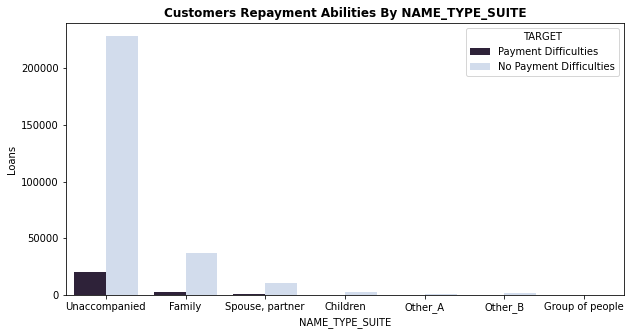

,NAME_TYPE_SUITE,TARGET,SK_ID_CURR
0,Children,No Payment Difficulties,3026
1,Children,Payment Difficulties,241
2,Family,No Payment Difficulties,37140
3,Family,Payment Difficulties,3009
4,Group of people,No Payment Difficulties,248
5,Group of people,Payment Difficulties,23
6,Other_A,No Payment Difficulties,790
7,Other_A,Payment Difficulties,76
8,Other_B,No Payment Difficulties,1596
9,Other_B,Payment Difficulties,174


In [31]:
univariate_tbl(app_train_target, 'NAME_TYPE_SUITE')

**Observations :**
* Both in capability and non capability, 'Unaccompanied' as a class is the majority class in this case.
* The curve over here falls very sharply, which means that there is a lot of variability.
* Applicants who have a higher percentage of having difficulty repaying the loan is **other_b**, within 9.8%.

### Univariate Analysis: Name_Education_Type

In [32]:
perc(app_train,'NAME_EDUCATION_TYPE', 'TARGET')

Details of customers who had difficulties to repay the loan on time by NAME_EDUCATION_TYPE


,NAME_EDUCATION_TYPE,TARGET,Percentage,Total
3,Lower secondary,417,10.927673,3816
4,Secondary / secondary special,19524,8.939929,218391
2,Incomplete higher,872,8.484966,10277
1,Higher education,4009,5.355115,74863
0,Academic degree,3,1.829268,164


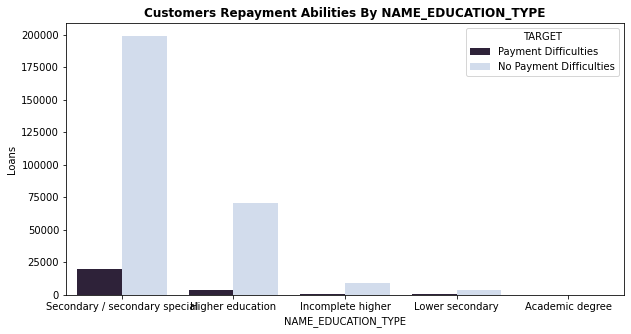

,NAME_EDUCATION_TYPE,TARGET,SK_ID_CURR
0,Academic degree,No Payment Difficulties,161
1,Academic degree,Payment Difficulties,3
2,Higher education,No Payment Difficulties,70854
3,Higher education,Payment Difficulties,4009
4,Incomplete higher,No Payment Difficulties,9405
5,Incomplete higher,Payment Difficulties,872
6,Lower secondary,No Payment Difficulties,3399
7,Lower secondary,Payment Difficulties,417
8,Secondary / secondary special,No Payment Difficulties,198867
9,Secondary / secondary special,Payment Difficulties,19524


In [33]:
univariate_tbl(app_train_target, 'NAME_EDUCATION_TYPE')

**Observations :**
* People with **Secondary/Secondary Special** as the highest level of education apply for **most number of loans (218K)**.
* Applicants with **Lower Secondary** has the highest percentage **(10.9%) having problem in repaying the loans**.

### Univariate Analysis: Name_Family_Status

In [34]:
perc(app_train,'NAME_FAMILY_STATUS', 'TARGET')

Details of customers who had difficulties to repay the loan on time by NAME_FAMILY_STATUS


,NAME_FAMILY_STATUS,TARGET,Percentage,Total
0,Civil marriage,2961,9.944584,29775
3,Single / not married,4457,9.807675,45444
2,Separated,1620,8.194234,19770
1,Married,14850,7.559868,196432
5,Widow,937,5.824217,16088
4,Unknown,0,0.000000,2


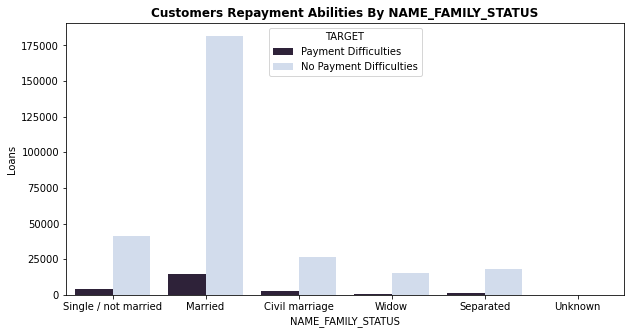

,NAME_FAMILY_STATUS,TARGET,SK_ID_CURR
0,Civil marriage,No Payment Difficulties,26814
1,Civil marriage,Payment Difficulties,2961
2,Married,No Payment Difficulties,181582
3,Married,Payment Difficulties,14850
4,Separated,No Payment Difficulties,18150
5,Separated,Payment Difficulties,1620
6,Single / not married,No Payment Difficulties,40987
7,Single / not married,Payment Difficulties,4457
8,Unknown,No Payment Difficulties,2
9,Widow,No Payment Difficulties,15151


In [35]:
univariate_tbl(app_train_target, 'NAME_FAMILY_STATUS')

**Observations :**
* Married people apply for the most number of loans (196K)
* Clients with family status of civil marriage and single have the highest percentage (around 9%) of clients who have problem in repaying the loans.

### Univariate Analysis: Name_Housing_Type

In [36]:
perc(app_train,'NAME_HOUSING_TYPE', 'TARGET')

Details of customers who had difficulties to repay the loan on time by NAME_HOUSING_TYPE


,NAME_HOUSING_TYPE,TARGET,Percentage,Total
4,Rented apartment,601,12.313051,4881
5,With parents,1736,11.698113,14840
2,Municipal apartment,955,8.539748,11183
0,Co-op apartment,89,7.932264,1122
1,House / apartment,21272,7.795711,272868
3,Office apartment,172,6.572411,2617


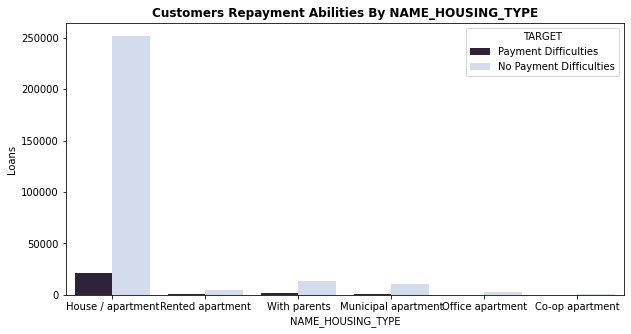

,NAME_HOUSING_TYPE,TARGET,SK_ID_CURR
0,Co-op apartment,No Payment Difficulties,1033
1,Co-op apartment,Payment Difficulties,89
2,House / apartment,No Payment Difficulties,251596
3,House / apartment,Payment Difficulties,21272
4,Municipal apartment,No Payment Difficulties,10228
5,Municipal apartment,Payment Difficulties,955
6,Office apartment,No Payment Difficulties,2445
7,Office apartment,Payment Difficulties,172
8,Rented apartment,No Payment Difficulties,4280
9,Rented apartment,Payment Difficulties,601


In [37]:
univariate_tbl(app_train_target, 'NAME_HOUSING_TYPE')

**Observations :**
* People living in a House/Apartment apply for the most number of loans and the number of people deemed incapable of repayment in this case is also the highest.
* Whereas if percentages are looked at, people living in rented apartment have the highest percentage (12%), followed by people who living with parents in 11% percentage.

### Univariate Analysis: Name_Income_Type

In [38]:
perc(app_train,'NAME_INCOME_TYPE', 'TARGET')

Details of customers who had difficulties to repay the loan on time by NAME_INCOME_TYPE


,NAME_INCOME_TYPE,TARGET,Percentage,Total
2,Maternity leave,2,40.000000,5
6,Unemployed,8,36.363636,22
7,Working,15224,9.588472,158774
1,Commercial associate,5360,7.484257,71617
4,State servant,1249,5.754965,21703
3,Pensioner,2982,5.386366,55362
0,Businessman,0,0.000000,10
5,Student,0,0.000000,18


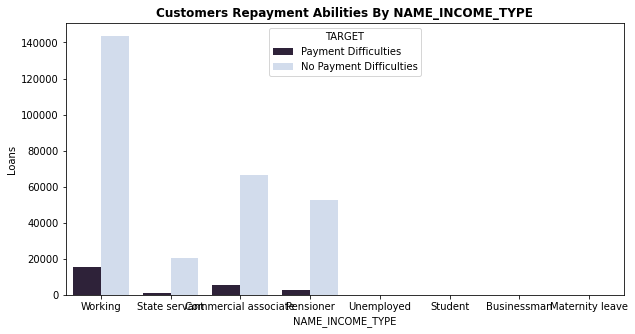

,NAME_INCOME_TYPE,TARGET,SK_ID_CURR
0,Businessman,No Payment Difficulties,10
1,Commercial associate,No Payment Difficulties,66257
2,Commercial associate,Payment Difficulties,5360
3,Maternity leave,No Payment Difficulties,3
4,Maternity leave,Payment Difficulties,2
5,Pensioner,No Payment Difficulties,52380
6,Pensioner,Payment Difficulties,2982
7,State servant,No Payment Difficulties,20454
8,State servant,Payment Difficulties,1249
9,Student,No Payment Difficulties,18


In [39]:
univariate_tbl(app_train_target, 'NAME_INCOME_TYPE')

**Observations :**
* The people who are working take the most number of loans (158K).
* Interesting observation over here is the fact that whatever loans the students and businessmen have applied to, they have been deemed capable of repayment of the same.
* While, clients with the income type of maternity leaves have the highest percentage (40%) of having problem in repaying the loan, followed by unemployed in 11% percentage.

### Univariate Analysis: Amt_Income_Total

In [40]:
income_data = app_train.groupby('SK_ID_CURR').agg({'AMT_INCOME_TOTAL':'mean'}).reset_index()
income_data.head(2)

,SK_ID_CURR,AMT_INCOME_TOTAL
0,100002,202500.0
1,100003,270000.0


In [41]:
income_data_final = pd.merge(app_train, income_data, on='SK_ID_CURR', how='left')

npd_income = income_data_final[income_data_final['TARGET']==0]['AMT_INCOME_TOTAL_x'].values
pd_income = income_data_final[income_data_final['TARGET']==1]['AMT_INCOME_TOTAL_x'].values

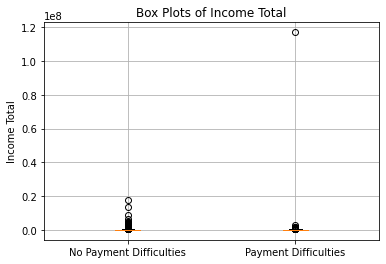

In [42]:
plt.boxplot([npd_income, pd_income])
plt.title('Box Plots of Income Total')
plt.xticks([1,2],('No Payment Difficulties','Payment Difficulties'))
plt.ylabel('Income Total')
plt.grid()
plt.show()

In [43]:
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Percentile", "No Payment Difficulties", "Payment Difficulties"]

for i in range(0,101,5):
    x.add_row([i,np.round(np.percentile(npd_income,i), 3),\
               np.round(np.percentile(pd_income,i), 3)])
print(x)

+------------+-------------------------+----------------------+
| Percentile | No Payment Difficulties | Payment Difficulties |
+------------+-------------------------+----------------------+
|     0      |         25650.0         |       25650.0        |
|     5      |         67500.0         |       67500.0        |
|     10     |         81000.0         |       81000.0        |
|     15     |         90000.0         |       90000.0        |
|     20     |         99000.0         |       99000.0        |
|     25     |         112500.0        |       112500.0       |
|     30     |         112500.0        |       112500.0       |
|     35     |         126000.0        |       120873.6       |
|     40     |         135000.0        |       135000.0       |
|     45     |         135000.0        |       135000.0       |
|     50     |         148500.0        |       135000.0       |
|     55     |         157500.0        |       157500.0       |
|     60     |         166500.0        |

**Observations :**
* We can see over here that till the 30th percentile, both clients who have payment difficulties as well as clients who have no payment difficulties, have mostly the same value.
* However, as we go higher, as the customer's income increases, the probability that cliets will not have difficulty repaying the loan also increases.

### Univariate Analysis: Amt_Credit

In [44]:
npd_loan_credit = app_train[app_train['TARGET']==0]['AMT_CREDIT'].values
pd_loan_credit = app_train[app_train['TARGET']==1]['AMT_CREDIT'].values

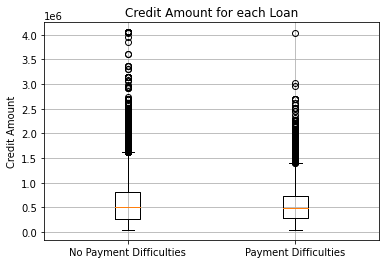

In [45]:
plt.boxplot([npd_loan_credit, pd_loan_credit])
plt.title('Credit Amount for each Loan')
plt.xticks([1,2],('No Payment Difficulties','Payment Difficulties'))
plt.ylabel('Credit Amount')
plt.grid()
plt.show()

**Observations :**
* We can see from the Boxplot above that the Median Value of the Credit Amount of the Customers who had no payment difficulties of loan is slightly larger than the Median Value of Customers who are have payment difficulties.
* This basically means that the customers with higher credit amount have a slightly higher chances of being capable of loan repayment than customers with lower credit amount.

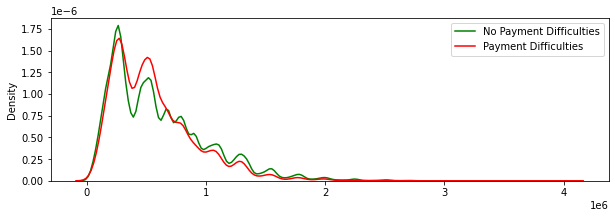

In [46]:
plt.figure(figsize=(10,3))
sns.distplot(npd_loan_credit,hist=False,label="No Payment Difficulties", color='green')
sns.distplot(pd_loan_credit,hist=False,label="Payment Difficulties", color='red')
plt.legend()
plt.show()

**Observations :**
* We can observe from above that the Credit Amount for most of the loans taken is less than 1 million.

### Univariate Analysos: Amt_Annuity

In [47]:
npd_loan_annuity = app_train[app_train['TARGET']==0]['AMT_ANNUITY'].values
pd_loan_annuity = app_train[app_train['TARGET']==1]['AMT_ANNUITY'].values

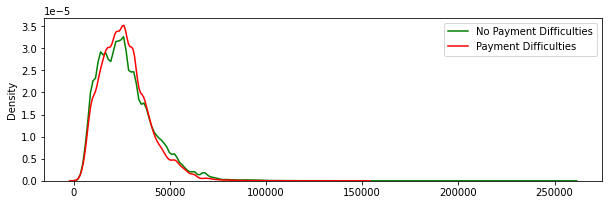

In [48]:
plt.figure(figsize=(10,3))
sns.distplot(npd_loan_annuity,hist=False,label="No Payment Difficulties", color='green')
sns.distplot(pd_loan_annuity,hist=False,label="Payment Difficulties", color='red')
plt.legend()
plt.show()

**Observations** :
* Most people pay annuity below 500K for the loans.

### Univariate Analysis: Amt_Goods_Price

In [49]:
npd_goods_price = app_train[app_train['TARGET']==0]['AMT_GOODS_PRICE'].values
pd_goods_price = app_train[app_train['TARGET']==1]['AMT_GOODS_PRICE'].values

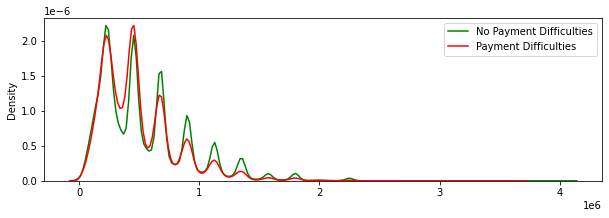

In [50]:
plt.figure(figsize=(10,3))
sns.distplot(npd_goods_price,hist=False,label="No Payment Difficulties", color='green')
sns.distplot(pd_goods_price,hist=False,label="Payment Difficulties", color='red')
plt.legend()
plt.show()

**Observations :**
* Most number of loans are given for goods that are priced below 1 million

### Univariate Analysis: Days_Birth

In [51]:
npd_days_birth = app_train[app_train['TARGET']==0]['DAYS_BIRTH'].values/-365
pd_days_birth = app_train[app_train['TARGET']==1]['DAYS_BIRTH'].values/-365

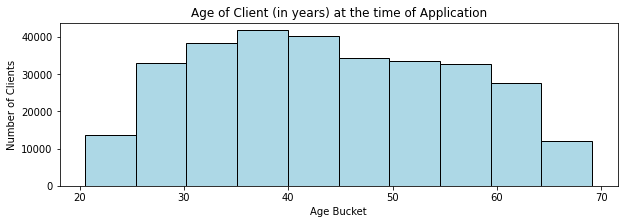

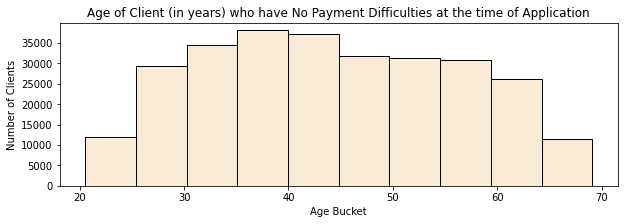

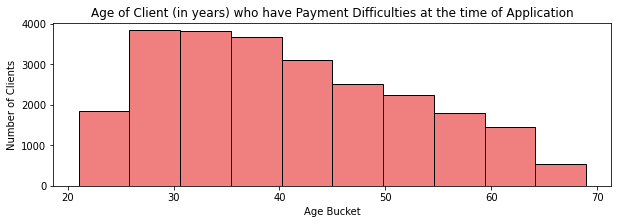

In [52]:
plt.figure(figsize=(10,3))
plt.hist(app_train['DAYS_BIRTH'].values/-365, bins=10, edgecolor='black', color='lightblue')
plt.title('Age of Client (in years) at the time of Application')
plt.xlabel('Age Bucket')
plt.ylabel('Number of Clients')
plt.show()

plt.figure(figsize=(10,3))
plt.hist(npd_days_birth, bins=10, edgecolor='black', color='antiquewhite')
plt.title('Age of Client (in years) who have No Payment Difficulties at the time of Application')
plt.xlabel('Age Bucket')
plt.ylabel('Number of Clients')
plt.show()

plt.figure(figsize=(10,3))
plt.hist(pd_days_birth, bins=10, edgecolor='black', color='lightcoral')
plt.title('Age of Client (in years) who have Payment Difficulties at the time of Application')
plt.xlabel('Age Bucket')
plt.ylabel('Number of Clients')
plt.show()

**Observations** :
* Most number of people applying for loans are in the range of 35-40 years whereas this is followed by people in the range of 40-45 years whereas the number of applicants in people aged < 25 or aged > 65 is very low.
* For the people who have no payment difficulties of loan repayment, people in the same age buckets of 35-40 years and 40-45 years are deemed to be most capable.
* People aged in the buckets 25-30 years and 30-35 years have a large chance of have payment difficulties for loan.

### Univariate Analysis: Days_Employed

In [53]:
capable_days_employed = app_train[app_train['TARGET']==0]['DAYS_EMPLOYED'].values/365
not_capable_days_employed = app_train[app_train['TARGET']==1]['DAYS_EMPLOYED'].values/365

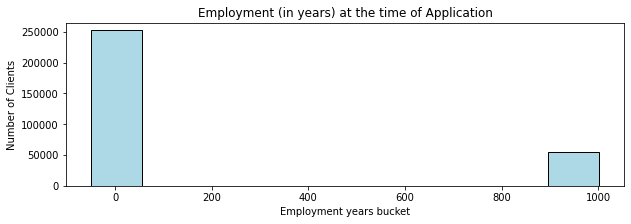

In [54]:
plt.figure(figsize=(10,3))
plt.hist(app_train['DAYS_EMPLOYED'].values/365, bins=10, edgecolor='black', color='lightblue')
plt.title('Employment (in years) at the time of Application')
plt.xlabel('Employment years bucket')
plt.ylabel('Number of Clients')
plt.show()

**Observations :**
* We have already converted the days into years for easy analysis, and we can see from the histogram that there are some clients that have worked for 1000 years.
* This is have an outlier, which we will clean these column.

### Univariate Analysis: Days_Registration

Days_Registration basically defines the number of days before the loan application that the client has changed the registration.

In [55]:
capable_days_registration = app_train[app_train['TARGET']==0]['DAYS_REGISTRATION'].values
not_capable_days_registration = app_train[app_train['TARGET']==1]['DAYS_REGISTRATION'].values

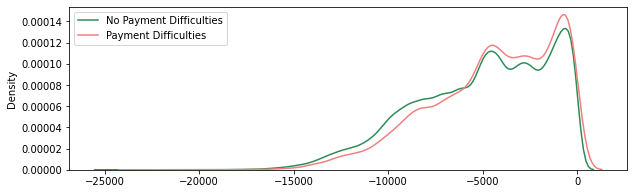

In [56]:
plt.figure(figsize=(10,3))
sns.distplot(capable_days_registration,hist=False,label="No Payment Difficulties", color='seagreen')
sns.distplot(not_capable_days_registration,hist=False,label="Payment Difficulties", color='lightcoral')
plt.legend()
plt.show()

**Observations** :
* Most of the clients have changed their registration less than 15000 days (41 years) before the loan application, whereas in most cases it is less than 5000 days (13 years).

### Univariate Analysis: Days_ID_Publish

This basically refers to the number of days before the application date that the client changed the identity document with which he applied for the loan.

In [57]:
capable_days_id_publish = app_train[app_train['TARGET']==0]['DAYS_ID_PUBLISH'].values
not_capable_days_id_publish = app_train[app_train['TARGET']==1]['DAYS_ID_PUBLISH'].values

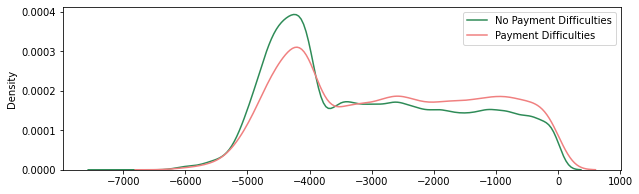

In [58]:
plt.figure(figsize=(10,3))
sns.distplot(capable_days_id_publish,hist=False,label="No Payment Difficulties", color='seagreen')
sns.distplot(not_capable_days_id_publish,hist=False,label="Payment Difficulties", color='lightcoral')
plt.legend()
plt.show()

**Observations** :
* Most of the clients have changed their identity document around 4000 days (10.95 years) before the application date.

### Univariate Analysis: Own_Car_Age

In [59]:
capable_car_age = app_train[app_train['TARGET']==0]['OWN_CAR_AGE'].values
not_capable_car_age = app_train[app_train['TARGET']==1]['OWN_CAR_AGE'].values

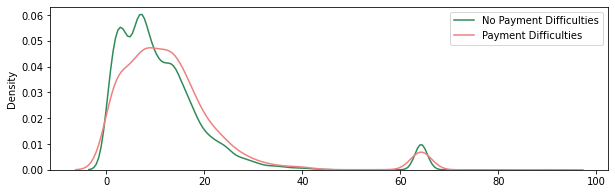

In [60]:
plt.figure(figsize=(10,3))
sns.distplot(capable_car_age,hist=False,label="No Payment Difficulties", color='seagreen')
sns.distplot(not_capable_car_age,hist=False,label="Payment Difficulties", color='lightcoral')
plt.legend()
plt.show()

**Observations** :
* Most of the clients have their cars less than 20 years old whereas there are very few cars that are older than 20 years.

### Univariate Analysis: Flag_Mobil

This is the Flag that indicates whether the loan applicant possesses a Mobile Phone or not. 1 means that yes, he/she owns a Mobile Phone whereas 0 means that he/she doesn't own a mobile phone.

In [61]:
perc(app_train,'FLAG_MOBIL', 'TARGET')

Details of customers who had difficulties to repay the loan on time by FLAG_MOBIL


,FLAG_MOBIL,TARGET,Percentage,Total
1,1,24825,8.072908,307510
0,0,0,0.000000,1


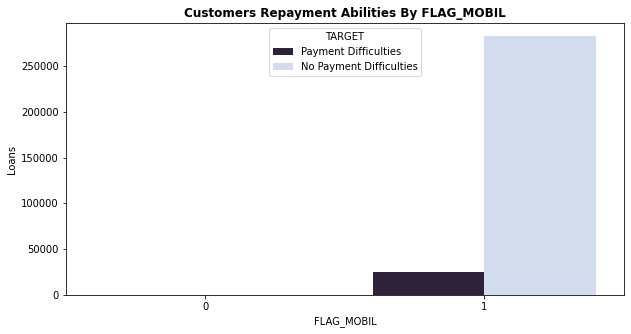

,FLAG_MOBIL,TARGET,SK_ID_CURR
0,0,No Payment Difficulties,1
1,1,No Payment Difficulties,282685
2,1,Payment Difficulties,24825


In [62]:
univariate_tbl(app_train_target, 'FLAG_MOBIL')

**Observations** :
* Out of the total 307511 loan applications in the Train Data, nearly everyone in the application owns a Mobile Phone out of which 92% are have no payment difficulties and 8% are have payment difficulties.
* There is only 1 applicant in the training data that does not own a Mobile Phone.

### Univariate Analysis: Flag_Emp_Phone

In [63]:
perc(app_train,'FLAG_EMP_PHONE', 'TARGET')

Details of customers who had difficulties to repay the loan on time by FLAG_EMP_PHONE


,FLAG_EMP_PHONE,TARGET,Percentage,Total
1,1,21834,8.659990,252125
0,0,2991,5.400282,55386


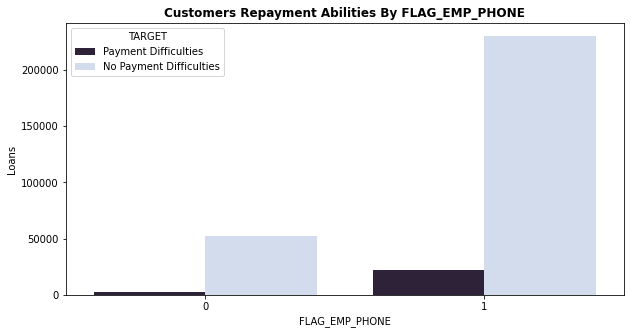

,FLAG_EMP_PHONE,TARGET,SK_ID_CURR
0,0,No Payment Difficulties,52395
1,0,Payment Difficulties,2991
2,1,No Payment Difficulties,230291
3,1,Payment Difficulties,21834


In [64]:
univariate_tbl(app_train_target, 'FLAG_EMP_PHONE')

**Observations** :
* A lot of the applicants provided their Work Phone (8.6%) more likely to have payment difficulties as compared to the applicants who did not provide their work phone (5%). However, the difference is not very significant.

### Univariate Analysis: Flag_Cont_Mobile

In [65]:
perc(app_train,'FLAG_CONT_MOBILE', 'TARGET')

Details of customers who had difficulties to repay the loan on time by FLAG_CONT_MOBILE


,FLAG_CONT_MOBILE,TARGET,Percentage,Total
1,1,24780,8.073318,306937
0,0,45,7.839721,574


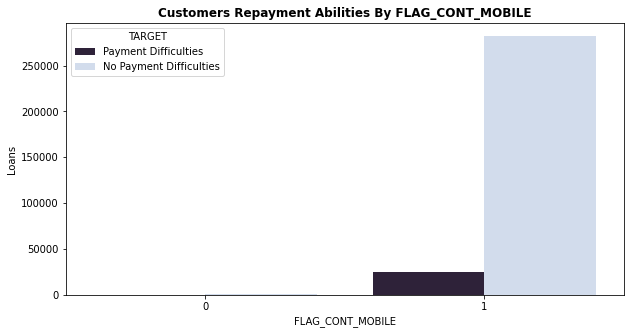

,FLAG_CONT_MOBILE,TARGET,SK_ID_CURR
0,0,No Payment Difficulties,529
1,0,Payment Difficulties,45
2,1,No Payment Difficulties,282157
3,1,Payment Difficulties,24780


In [66]:
univariate_tbl(app_train_target, 'FLAG_CONT_MOBILE')

**Observations** :
* Most the applicants had their phone reachable when the Bank tried to contact them.
* A lot of the applicants had their phone reachable when the Bank tried to contact them (8%) have payment difficulties as compared to the applicants who did not had their phone reachable when the Bank tried to contact them (7.8%). However, the difference is not very significant.

### Univariate Analysis: Flag_Email

In [67]:
perc(app_train,'FLAG_EMAIL', 'TARGET')

Details of customers who had difficulties to repay the loan on time by FLAG_EMAIL


,FLAG_EMAIL,TARGET,Percentage,Total
0,0,23451,8.084628,290069
1,1,1374,7.877537,17442


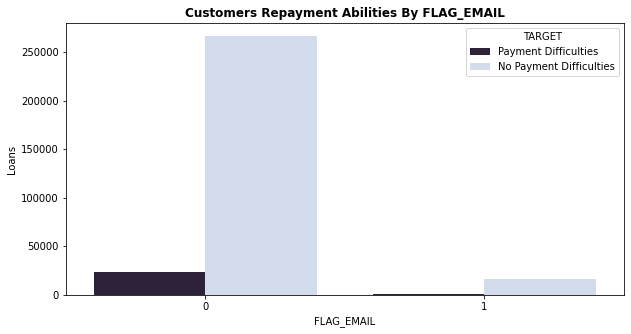

,FLAG_EMAIL,TARGET,SK_ID_CURR
0,0,No Payment Difficulties,266618
1,0,Payment Difficulties,23451
2,1,No Payment Difficulties,16068
3,1,Payment Difficulties,1374


In [68]:
univariate_tbl(app_train_target, 'FLAG_EMAIL')

**Observations** :
* This goes on to show that approximately 94% of the clients did not provide their Email Address in the application, and only 6% of the clients provided Email details.

### Univariate Analysis: Occupation_Type

In [69]:
app_train['OCCUPATION_TYPE'].unique()

array(['Laborers', 'Core staff', 'Accountants', 'Managers', nan,
       'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

In [70]:
app_train['OCCUPATION_TYPE'].fillna('Data_Not_Available', inplace=True)
perc(app_train,'OCCUPATION_TYPE', 'TARGET')

Details of customers who had difficulties to repay the loan on time by OCCUPATION_TYPE


,OCCUPATION_TYPE,TARGET,Percentage,Total
10,Low-skill Laborers,359,17.152413,2093
5,Drivers,2107,11.326130,18603
18,Waiters/barmen staff,152,11.275964,1348
17,Security staff,722,10.742449,6721
9,Laborers,5838,10.578770,55186
2,Cooking staff,621,10.443996,5946
15,Sales staff,3092,9.631799,32102
1,Cleaning staff,447,9.606705,4653
14,Realty agents,59,7.856192,751
16,Secretaries,92,7.049808,1305


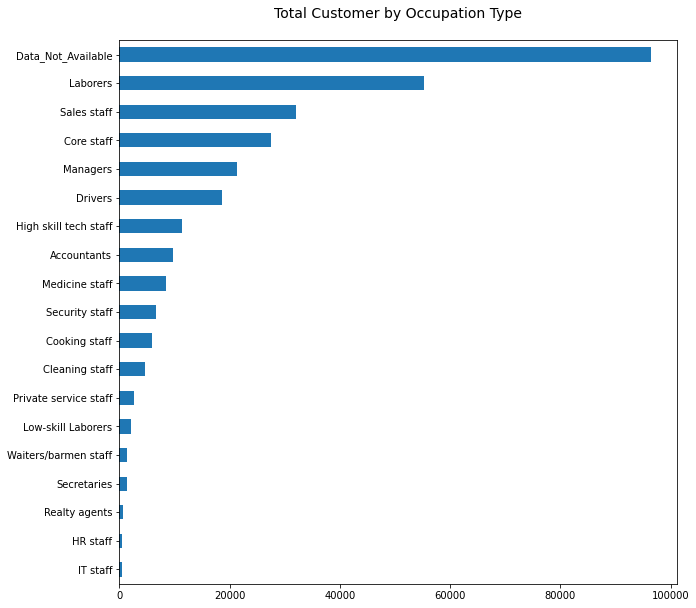

In [71]:
#plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10,10))
app_train['OCCUPATION_TYPE'].value_counts().sort_values().plot(kind = 'barh')
plt.title('Total Customer by Occupation Type\n', fontsize=14)
plt.show()

In [72]:
app_train_target['OCCUPATION_TYPE'].fillna('Data_Not_Available', inplace=True)
univariate_tb(app_train_target, 'OCCUPATION_TYPE')

,OCCUPATION_TYPE,TARGET,SK_ID_CURR
0,Accountants,No Payment Difficulties,9339
1,Accountants,Payment Difficulties,474
2,Cleaning staff,No Payment Difficulties,4206
3,Cleaning staff,Payment Difficulties,447
4,Cooking staff,No Payment Difficulties,5325
5,Cooking staff,Payment Difficulties,621
6,Core staff,No Payment Difficulties,25832
7,Core staff,Payment Difficulties,1738
8,Data_Not_Available,No Payment Difficulties,90113
9,Data_Not_Available,Payment Difficulties,6278


**Observations** :
* Out of all the possible Occupation Types, the majority of applicants have not provided their Occupation Type in the application (96K) which is followed by Laborers (55K).
* Out of all the occupations, Low-skill labors have the highest percentage (17%) of having problem in repaying the loan.

### Univariate Analysis: Cnt_Fam_Members

In [73]:
app_train['CNT_FAM_MEMBERS'].isnull().sum()

2

In [74]:
#Replace NA with the most frequently occuring class for Count of Client Family Members
app_train['CNT_FAM_MEMBERS'].fillna(app_train['CNT_FAM_MEMBERS'].value_counts().idxmax(), inplace=True)

In [75]:
capable_family_members = app_train[app_train['TARGET']==0]['CNT_FAM_MEMBERS'].values
not_capable_family_members = app_train[app_train['TARGET']==1]['CNT_FAM_MEMBERS'].values

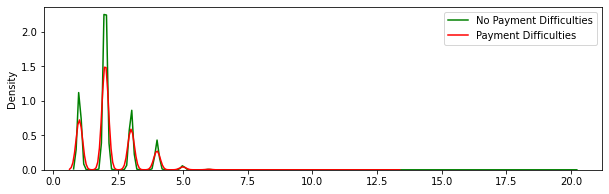

In [76]:
plt.figure(figsize=(10,3))
sns.distplot(capable_family_members,hist=False,label="No Payment Difficulties", color='green')
sns.distplot(not_capable_family_members,hist=False,label="Payment Difficulties", color='red')
plt.legend()
plt.show()

**Observations** :
* Most of the applicants have 2 Family Members and there are very few applicants with >5 family members.

### Univariate Analysis: Weekday_Appr_Process_Start

In [77]:
perc(app_train,'WEEKDAY_APPR_PROCESS_START', 'TARGET')

Details of customers who had difficulties to repay the loan on time by WEEKDAY_APPR_PROCESS_START


,WEEKDAY_APPR_PROCESS_START,TARGET,Percentage,Total
5,TUESDAY,4501,8.350494,53901
6,WEDNESDAY,4238,8.160357,51934
0,FRIDAY,4101,8.146927,50338
4,THURSDAY,4098,8.100255,50591
3,SUNDAY,1283,7.929053,16181
2,SATURDAY,2670,7.887274,33852
1,MONDAY,3934,7.757227,50714


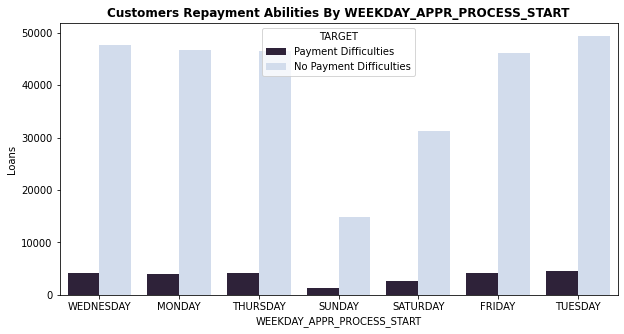

,WEEKDAY_APPR_PROCESS_START,TARGET,SK_ID_CURR
0,FRIDAY,No Payment Difficulties,46237
1,FRIDAY,Payment Difficulties,4101
2,MONDAY,No Payment Difficulties,46780
3,MONDAY,Payment Difficulties,3934
4,SATURDAY,No Payment Difficulties,31182
5,SATURDAY,Payment Difficulties,2670
6,SUNDAY,No Payment Difficulties,14898
7,SUNDAY,Payment Difficulties,1283
8,THURSDAY,No Payment Difficulties,46493
9,THURSDAY,Payment Difficulties,4098


In [78]:
univariate_tbl(app_train_target, 'WEEKDAY_APPR_PROCESS_START')

**Observations** :
* The number of applications are spread almost uniformly throughout the weekdays (Monday-Friday) (approx. 50K applications per day), whereas the number of applications is very low on a Sunday.
* Each application processing day has almost the same percentage (about 7% - 8%) in of having problem in repaying the loans.

### Univariate Analysis: Organization_Type

In [79]:
perc(app_train,'ORGANIZATION_TYPE', 'TARGET')

Details of customers who had difficulties to repay the loan on time by ORGANIZATION_TYPE


,ORGANIZATION_TYPE,TARGET,Percentage,Total
54,Transport: type 3,187,15.754002,1187
18,Industry: type 13,9,13.432836,67
25,Industry: type 8,3,12.500000,24
38,Restaurant,212,11.706240,1811
7,Construction,785,11.679810,6721
6,Cleaning,29,11.153846,260
14,Industry: type 1,115,11.068335,1039
20,Industry: type 3,348,10.616229,3278
36,Realtor,42,10.606061,396
1,Agriculture,257,10.472698,2454


In [80]:
univariate_tb(app_train_target, 'ORGANIZATION_TYPE')

,ORGANIZATION_TYPE,TARGET,SK_ID_CURR
0,Advertising,No Payment Difficulties,394
1,Advertising,Payment Difficulties,35
2,Agriculture,No Payment Difficulties,2197
3,Agriculture,Payment Difficulties,257
4,Bank,No Payment Difficulties,2377
5,Bank,Payment Difficulties,130
6,Business Entity Type 1,No Payment Difficulties,5497
7,Business Entity Type 1,Payment Difficulties,487
8,Business Entity Type 2,No Payment Difficulties,9653
9,Business Entity Type 2,Payment Difficulties,900


**Observations** :
* Business people and XNA (No information provided) are the highest number of applicants 
* the clients with organization type of transport: type 3 has the highest percentage (15.7%) of having problem in repaying the loans.

### Univariate Analysis: EXT_SOURCE_1

EXT_SOURCE_1 is a Normalized Score from an External Data Source - 1.

In [81]:
app_train['EXT_SOURCE_1'].isnull().sum()

173378

**Note** :
This basically shows that approx. 173378/307511 ie. nearly 56% of the entries in the EXT_SOURCE_1 column are nulls ie. empty values, and we will look at the remaining values only. We can carry out replacement of these values with the Mean/Median/Mode for the entire numerical column but since this is a large number of nulls, we will not follow that approach.

In [82]:
capable_ext_source_1 = app_train[app_train['TARGET']==0]['EXT_SOURCE_1'].values
not_capable_ext_source_1 = app_train[app_train['TARGET']==1]['EXT_SOURCE_1'].values

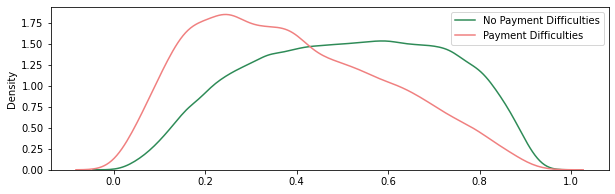

In [83]:
plt.figure(figsize=(10,3))
sns.distplot(capable_ext_source_1,hist=False,label="No Payment Difficulties", color='seagreen')
sns.distplot(not_capable_ext_source_1,hist=False,label="Payment Difficulties", color='lightcoral')
plt.legend()
plt.show()

**Observations** :
* This is the first feature that we are seeing where there is some considerable difference among the 2 classes, as we can see from the plot.
* Therefore, EXT_SOURCE_1 is going to be an important feature.

### Univariate Analysis: EXT_SOURCE_2

EXT_SOURCE_2 is a Normalized Score from an External Data Source - 2.

In [84]:
app_train['EXT_SOURCE_2'].isnull().sum()

660

**Note** :
This basically shows that approx. 660/307511 ie. only 0.2% of the entries in the column are nulls. We will analyse on the non-empty values in the column.

In [85]:
capable_ext_source_2 = app_train[app_train['TARGET']==0]['EXT_SOURCE_2'].values
not_capable_ext_source_2 = app_train[app_train['TARGET']==1]['EXT_SOURCE_2'].values

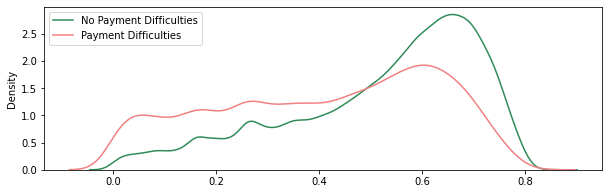

In [86]:
plt.figure(figsize=(10,3))
sns.distplot(capable_ext_source_2,hist=False,label="No Payment Difficulties", color='seagreen')
sns.distplot(not_capable_ext_source_2,hist=False,label="Payment Difficulties", color='lightcoral')
plt.legend()
plt.show()

**Observations** :
* In this case also we can see that the data is reasonably well separated and hence this will also be an important feature.

### Univariate Analysis: EXT_SOURCE_3

EXT_SOURCE_3 is a Normalized Score from an External Data Source - 3.

In [87]:
app_train['EXT_SOURCE_3'].isnull().sum()

60965

**Note** :
* This basically shows that 60965/307511 ie. 19% of the entries in the column are nulls. We will analyse on the non-empty values in the column.

In [88]:
capable_ext_source_3 = app_train[app_train['TARGET']==0]['EXT_SOURCE_3'].values
not_capable_ext_source_3 = app_train[app_train['TARGET']==1]['EXT_SOURCE_3'].values

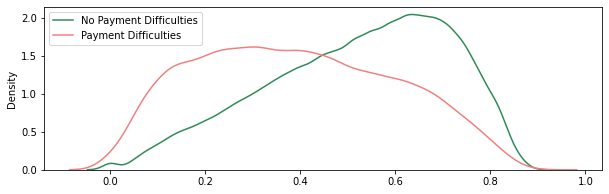

In [89]:
plt.figure(figsize=(10,3))
sns.distplot(capable_ext_source_3,hist=False,label="No Payment Difficulties", color='seagreen')
sns.distplot(not_capable_ext_source_3,hist=False,label="Payment Difficulties", color='lightcoral')
plt.legend()
plt.show()

**Observations** :
* Again, the data is reasonably well separated and hence this will also be an important feature.

### Univariate Analysis: Flag_Document_x

There are multiple Flag Document Columns in the Train and Test Dataframes that we are to analyse if they are going to add much value to the models that we will build or not. In order to analyse, we will first take a subset of all the columns from the Dataframe that has the term 'FLAG' present in the column name.

In [90]:
flag_document_df = app_train.loc[:, app_train.columns.str.contains('DOCUMENT')]
flag_document_df.head(5)

,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


**Note**

As we can see over here, we have a total of 20 Flag Document Columns in the dataframe pertaining to different documents where 1 denotes that the client has provided the corresponding document in the loan application and 0 denotes that the client has not provided the corresponding document.

In [91]:
for column in flag_document_df:
    
    count_0 = flag_document_df[column].value_counts()[0]
    count_1 = flag_document_df[column].value_counts()[1]
    total_rows = flag_document_df.shape[0]
    
    percent_0 = np.round((count_0*100/total_rows),2)
    percent_1 = np.round(100 - percent_0,2)
    
    print(column, "contains percentage of 1's = ",percent_1,\
    "and percentage of 0's =", percent_0)

FLAG_DOCUMENT_2 contains percentage of 1's =  0.0 and percentage of 0's = 100.0
FLAG_DOCUMENT_3 contains percentage of 1's =  71.0 and percentage of 0's = 29.0
FLAG_DOCUMENT_4 contains percentage of 1's =  0.01 and percentage of 0's = 99.99
FLAG_DOCUMENT_5 contains percentage of 1's =  1.51 and percentage of 0's = 98.49
FLAG_DOCUMENT_6 contains percentage of 1's =  8.81 and percentage of 0's = 91.19
FLAG_DOCUMENT_7 contains percentage of 1's =  0.02 and percentage of 0's = 99.98
FLAG_DOCUMENT_8 contains percentage of 1's =  8.14 and percentage of 0's = 91.86
FLAG_DOCUMENT_9 contains percentage of 1's =  0.39 and percentage of 0's = 99.61
FLAG_DOCUMENT_10 contains percentage of 1's =  0.0 and percentage of 0's = 100.0
FLAG_DOCUMENT_11 contains percentage of 1's =  0.39 and percentage of 0's = 99.61
FLAG_DOCUMENT_12 contains percentage of 1's =  0.0 and percentage of 0's = 100.0
FLAG_DOCUMENT_13 contains percentage of 1's =  0.35 and percentage of 0's = 99.65
FLAG_DOCUMENT_14 contains pe

**Observations** :
* We can see from here that the percentage of 1s (ie. the client has submitted the document) is very small in most of the cases, which means that the data is highly imbalanced and its presence in the dataset is not going to help us very much.
* However, Flag_Document_3 has a good presence of 1s and we can remove all the Flag_Document columns except this one.

## Multivariant Visualization

In [92]:
def catplt (datas, col1, col2, col3):
  fig = sns.catplot(x=col1, 
            y=col2, 
            hue='TARGET',
            col=col3, 
            data=datas,
            color = 'seagreen',
            palette = 'ch:start=1,rot=-.9_r',
            kind='bar', 
            height=7, aspect=.7)
  fig.set_xticklabels(rotation=45, horizontalalignment='right')
  plt.show()

**Bivariate Analysis: AMT_CREDIT vs AMT_ANNUITY**

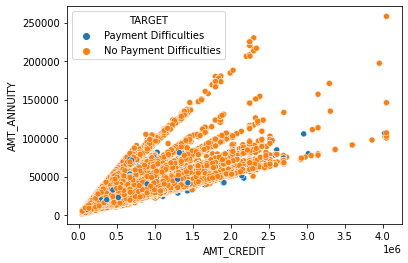

In [93]:
sns.scatterplot(
    data=app_train_target, x="AMT_CREDIT", y="AMT_ANNUITY", hue="TARGET", sizes=(20, 200)
)

**Observations** :
* This shows that both the Amount Credit and Amount Annuity are directly proportional to each other. If the Credit Amount is high, the Annuity Amount for the same will also be high.
* We are able to see an almost Linear graph. However, based on these 2 numeric features, we are not able to carry out Binary Classification with the help of Simple Logistic Regression. 

### Group by Realty Ownership Status

**Car Ownership Status, AMT Credit, Target, and House/Flat Ownership**

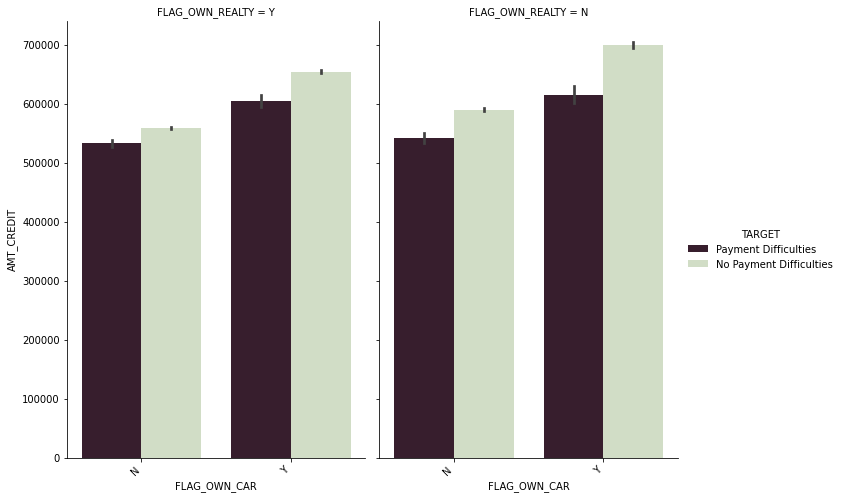

In [94]:
catplt (app_train_target, 'FLAG_OWN_CAR', 'AMT_CREDIT', 'FLAG_OWN_REALTY')

**Observations** :
* This shows that clients who **own a car** and **do not own house/flat** have have higher chances of being deemed **capable** of loan repayment based on their credit amount, compared to client who own house/flat.

**Income Type, AMT Credit, Target, and House/Flat Ownership**

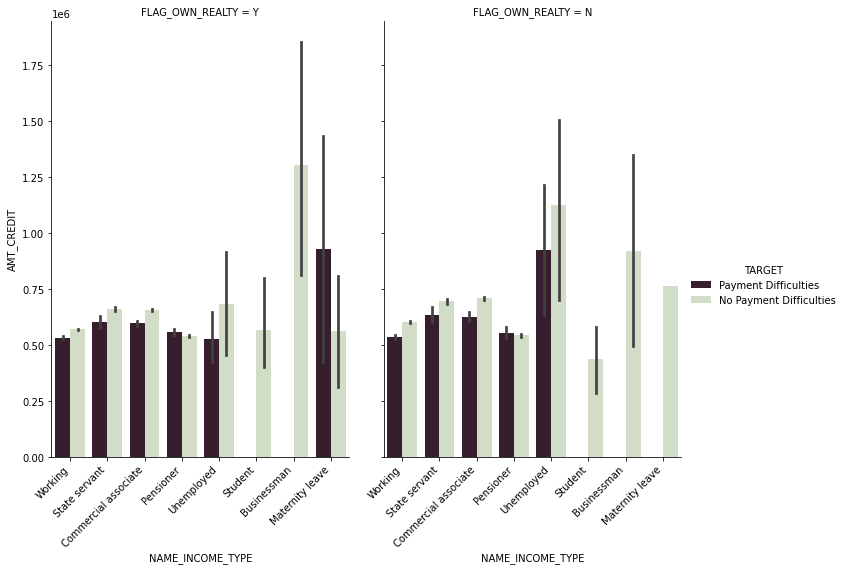

In [95]:
catplt (app_train_target, 'NAME_INCOME_TYPE', 'AMT_CREDIT', 'FLAG_OWN_REALTY')

**Observations** :
* This shows that applicants with a higher value of credit amount, **not own a house/flat** and income types **Unemployed** higher likelihood of deemed **not capable** of loan repayment.
* This shows that applicants with income type **maternity leave** who **own a house/flat**  higher likelihood of deemed **not capable** of loan repayment compared to who not own a house/flat.

**Name Education Type, AMT Annuity, Target, and House/Flat Ownership**

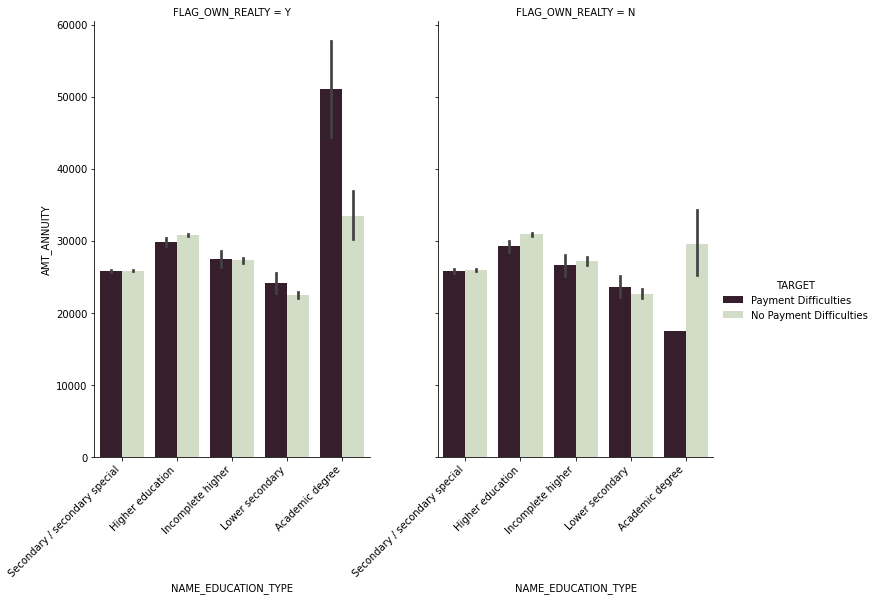

In [96]:
catplt (app_train_target, 'NAME_EDUCATION_TYPE', 'AMT_ANNUITY', 'FLAG_OWN_REALTY')

**Observations** :
* This shows that applicants with a higher value of AMT Annuity, **own a house/flat** and name education types **academic degree**, higher likelihood of deemed **not capable** of loan repayment.

### Group by Car Ownership Status

**Contract Type, AMT Income Total, Target, and Car Ownership**

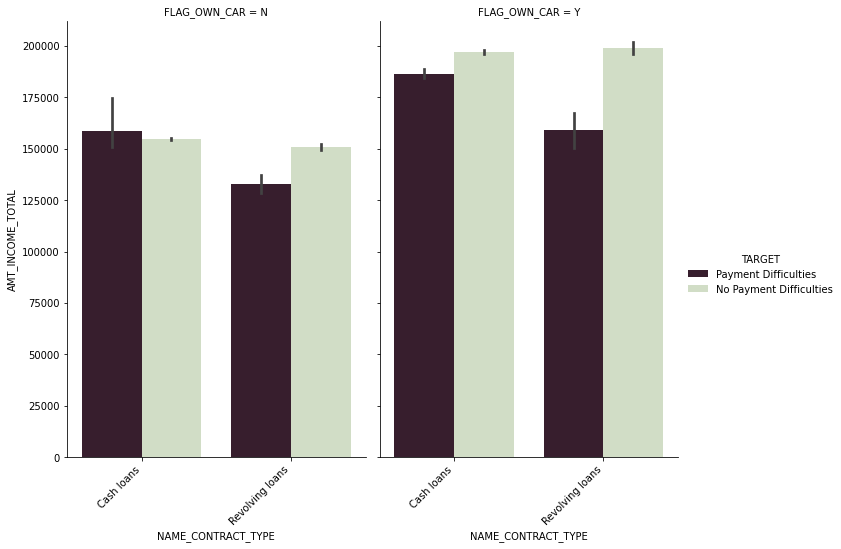

In [97]:
catplt (app_train_target, 'NAME_CONTRACT_TYPE', 'AMT_INCOME_TOTAL', 'FLAG_OWN_CAR')

**Observations** :
* This shows that applicants with a higher value of income total, **own a car** and contract types of **revolving loans**, higher likelihood of deemed **capable** of loan repayment.

**Family Status, AMT Credit, Target, and Car Ownership**

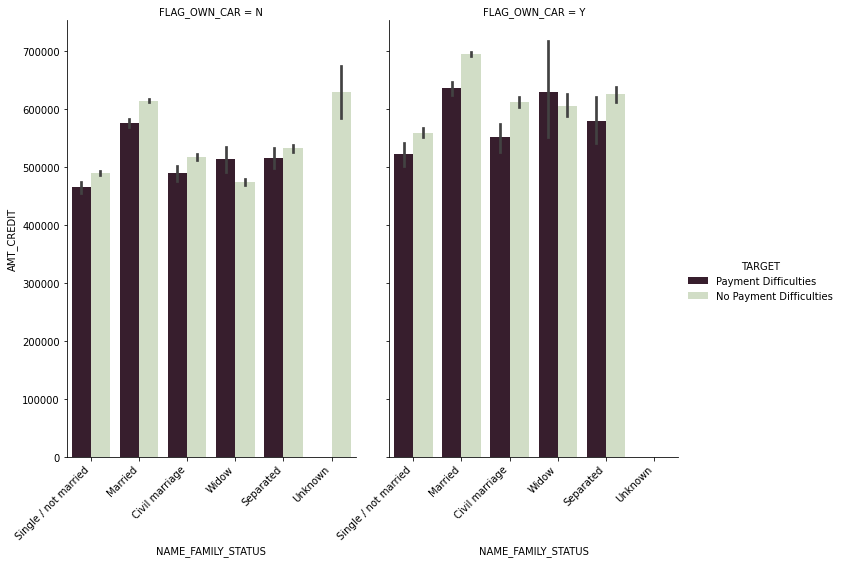

In [98]:
catplt (app_train_target, 'NAME_FAMILY_STATUS', 'AMT_CREDIT', 'FLAG_OWN_CAR')

**Observations** :
* This shows that applicants with a higher value of AMT Credit, **own a car** and family type of **married**, higher likelihood of deemed **capable** of loan tepayment.

**Housing Type, AMT Credit, Target, and Car Ownership**

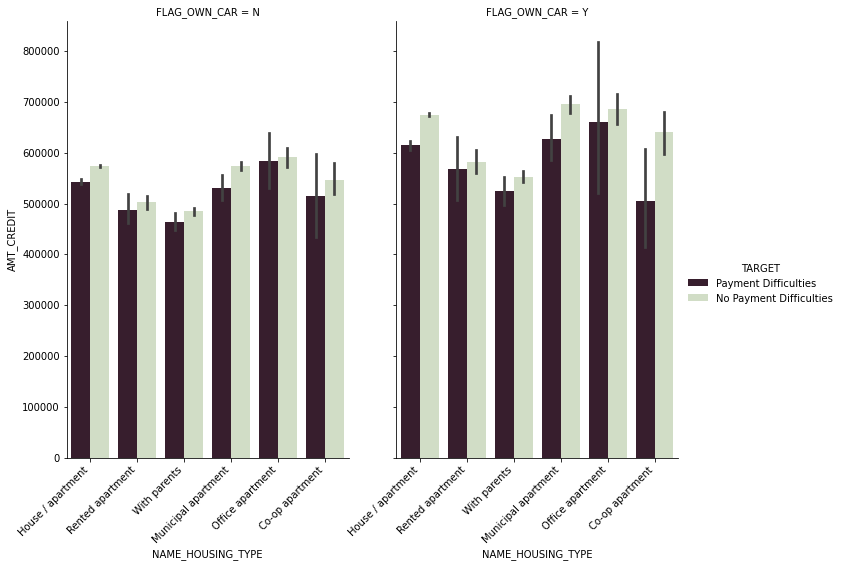

In [99]:
catplt (app_train_target, 'NAME_HOUSING_TYPE', 'AMT_CREDIT', 'FLAG_OWN_CAR')

**Observations** :
* This shows that applicants with a higher value of AMT Credit, **own a car** and housing type of **house/apartment, munical and office apartment**, higher likelihood of deemed **capable** of loan repayment.


Number of customers who own a car: 104587 , ( 34.010815873253314 % )
Number of customers who do not own a car: 202924 , ( 65.98918412674668 % )


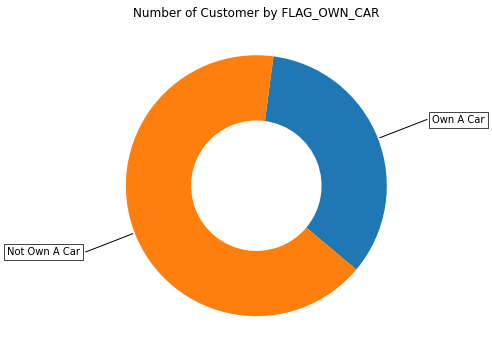

In [100]:
y_value_counts = app_train['FLAG_OWN_CAR'].value_counts()
print("Number of customers who own a car:", y_value_counts[1],", (",(y_value_counts[1]/(y_value_counts[1]+y_value_counts[0]))*100,"% )")
print("Number of customers who do not own a car:", y_value_counts[0],", (",(y_value_counts[0]/(y_value_counts[1]+y_value_counts[0]))*100,"% )")

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
recipe = ["Own A Car", "Not Own A Car"]

data = [y_value_counts[1], y_value_counts[0]]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5),\
                       startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Number of Customer by FLAG_OWN_CAR")

plt.show()

Based on this data, only 34% clients who own a car. Meanawhile on previous observation, clients who own a car morelikely capable to repay their loans. 

### Group by Region Rating Client

**Education Type, AMT Credit, Target, and Region Rating Client**

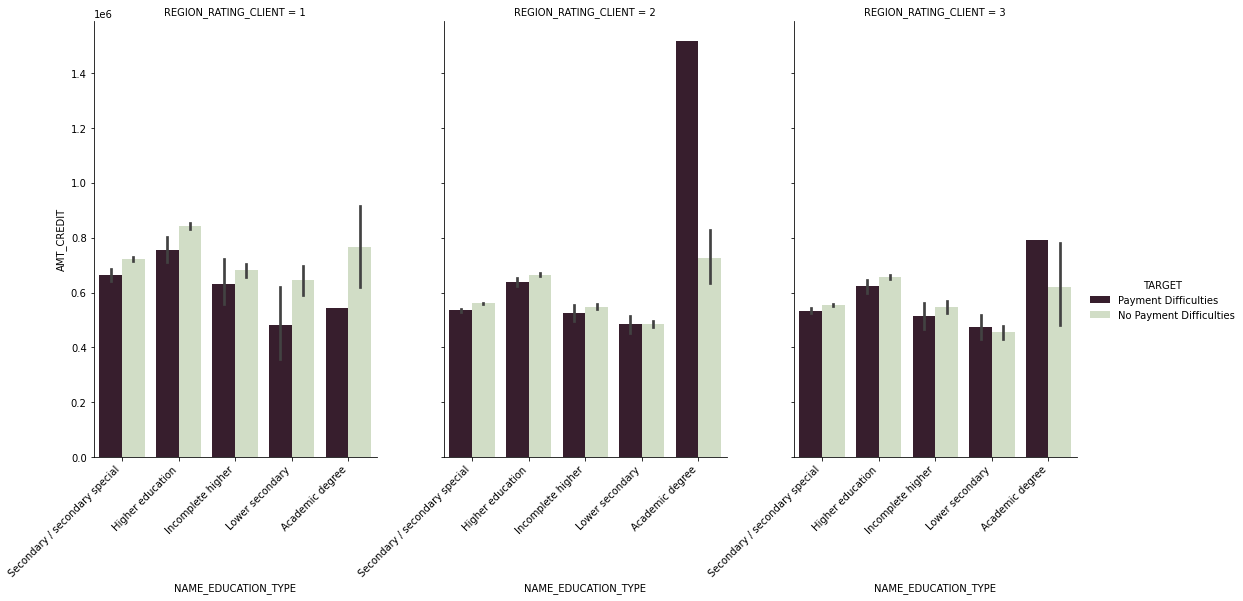

In [101]:
catplt (app_train_target, 'NAME_EDUCATION_TYPE', 'AMT_CREDIT', 'REGION_RATING_CLIENT')

**Observations** :
* This shows that applicants with a higher value of AMT Credit, **region rating client = 2** and education type of **academic degree**, higher likelihood of deemed **not capable** of loan tepayment, compared to other region.

**Education Type, AMT Credit, Target, and Region Rating Client**

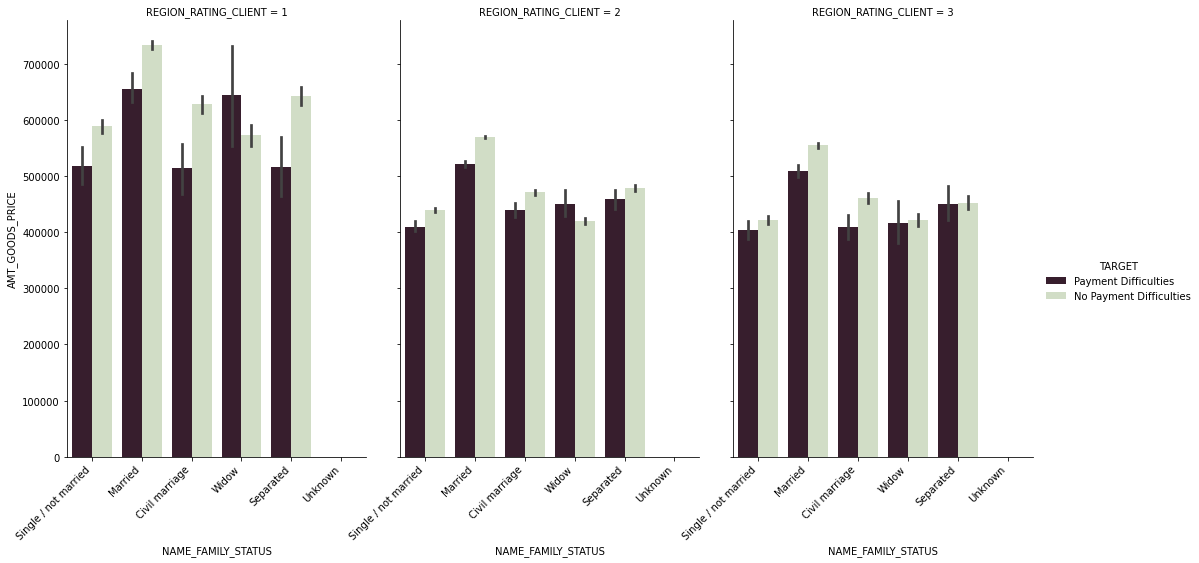

In [102]:
catplt (app_train_target, 'NAME_FAMILY_STATUS', 'AMT_GOODS_PRICE', 'REGION_RATING_CLIENT')

**Observations** :
* This shows that applicants with a higher value of AMT Goods Price, **region rating client = 1** and family status of **Married**, higher likelihood of deemed **capable** of loan tepayment, compared to other region.

## Data Cleaning - Fixing Null Values and Outliers

### 1.3.1. Days_Birth

In [103]:
print("The shape of the train dataset = ",app_train.shape)
app_train['DAYS_BIRTH'].describe()

The shape of the train dataset =  (307511, 122)


count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [104]:
print("The maximum age across all applicants (in years) = ", 
      - min(app_train['DAYS_BIRTH'].values)/365)

print("\nThe minimum age across all applicants (in years) = ", 
      - max(app_train['DAYS_BIRTH'].values)/365)


The maximum age across all applicants (in years) =  69.12054794520547

The minimum age across all applicants (in years) =  20.517808219178082


**Observations :**
This basically means that both the minimum as well as the maxium ages are admissible and there are no outliers present in the 'Days_Birth' column.

### 1.3.2. Days_Employed


The column 'Days_Employed' basically refers to the number ofdays before the loan application that the client started his/her first job, and since this is relative to the application, all values must be negative and there cannot be any positive value.

In [105]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [106]:
print("The minimum employment across all applicants (in years) = ", 
      max(app_train['DAYS_EMPLOYED'].values)/365)

print("The maximum employment across all applicants (in years) = ", 
      min(app_train['DAYS_EMPLOYED'].values)/365)

The minimum employment across all applicants (in years) =  1000.6657534246575
The maximum employment across all applicants (in years) =  -49.07397260273972


**Observations :**
As shown over here, the maximum time (of employment) in years is 1000 years, which is clearly an error, and we will remove all the positive values in the same column.

In [107]:
app_train.replace(max(app_train['DAYS_EMPLOYED'].values), np.nan, inplace=True)

In [108]:
print("The minimum employment across all applicants (in years) = ", 
      max(app_train['DAYS_EMPLOYED'].values)/365)

print("The maximum employment across all applicants (in years) = ", 
      min(app_train['DAYS_EMPLOYED'].values)/365)

The minimum employment across all applicants (in years) =  0.0
The maximum employment across all applicants (in years) =  -49.07397260273972


### 1.3.3. Days_Registration

Again, Days_Registration also should be non-positive values and we will check the outliers in this case.

In [109]:
app_train['DAYS_REGISTRATION'].describe()

count    307511.0
mean          NaN
std           NaN
min      -24672.0
25%       -7480.0
50%       -4504.0
75%       -2010.0
max           0.0
Name: DAYS_REGISTRATION, dtype: float64

In [110]:
print("The minimum days of registration across all applicants (in years) = ", 
      max (app_train['DAYS_REGISTRATION'].values)/365)

print("The minimum days of registration across all applicants (in years) = ", 
      min(app_train['DAYS_REGISTRATION'].values)/365)

The minimum days of registration across all applicants (in years) =  0.0
The minimum days of registration across all applicants (in years) =  -67.59452054794521


Observations :
This shows that both the minimum as well as the maximum days of registration are admissible and there are no outliers present in the 'Days_Registration' column.

### Detecting Data Duplication

In [111]:
print('The number of duplication is:', app_train.duplicated().sum())

The number of duplication is: 0


### 1.3.4. Removing Outliers and Null Values

In [112]:
def fill_nulls_outliers(data):

  data['NAME_FAMILY_STATUS'].fillna('Data_Not_Available', inplace=True)
  data['NAME_HOUSING_TYPE'].fillna('Data_Not_Available', inplace=True)

  data['FLAG_MOBIL'].fillna('Data_Not_Available', inplace=True)
  data['FLAG_EMP_PHONE'].fillna('Data_Not_Available', inplace=True)
  data['FLAG_CONT_MOBILE'].fillna('Data_Not_Available', inplace=True)
  data['FLAG_EMAIL'].fillna('Data_Not_Available', inplace=True)

  #Replace NA with the most frequently occuring class for Count of Client Family Members
  data['CNT_FAM_MEMBERS'].fillna(data['CNT_FAM_MEMBERS'].value_counts().idxmax(), inplace=True)
        
  data.replace(max(data['DAYS_EMPLOYED'].values), np.nan, inplace=True)

  data['CODE_GENDER'].replace('XNA','M',inplace=True)
  #There are a total of 4 applicants with Gender provided as 'XNA'

  data['AMT_ANNUITY'].fillna(0, inplace=True)
  #A total of 12 datapoints are there where Annuity Amount is null.

  data['AMT_GOODS_PRICE'].fillna(0, inplace=True)
  #A total of 278 datapoints are there where AMT Goods Price is null.

  data['NAME_TYPE_SUITE'].fillna('Unaccompanied', inplace=True)
  #Removing datapoints where name_type_suite is null.

  data['OWN_CAR_AGE'].fillna(0, inplace=True)
  #A total of 202929 datapoints are there where own_car_age is null.

  data['NAME_FAMILY_STATUS'].replace('Unknown','Married', inplace=True)
 #Removing datapoints where 'Name_Family_Status' is Unknown.

  data['OCCUPATION_TYPE'].fillna('Data_Not_Available', inplace=True)

  data['EXT_SOURCE_1'].fillna(0, inplace=True)
  data['EXT_SOURCE_2'].fillna(0, inplace=True)
  data['EXT_SOURCE_3'].fillna(0, inplace=True)

  data['APARTMENTS_AVG'].fillna(0, inplace=True)
  data['BASEMENTAREA_AVG'].fillna(0, inplace=True)
  data['YEARS_BEGINEXPLUATATION_AVG'].fillna(0, inplace=True)
  data['YEARS_BUILD_AVG'].fillna(0, inplace=True)
  data['COMMONAREA_AVG'].fillna(0, inplace=True)
  data['ELEVATORS_AVG'].fillna(0, inplace=True)
  data['ENTRANCES_AVG'].fillna(0, inplace=True)
  data['FLOORSMAX_AVG'].fillna(0, inplace=True)
  data['FLOORSMIN_AVG'].fillna(0, inplace=True)
  data['LANDAREA_AVG'].fillna(0, inplace=True)
  data['LIVINGAPARTMENTS_AVG'].fillna(0, inplace=True)
  data['LIVINGAREA_AVG'].fillna(0, inplace=True)
  data['NONLIVINGAPARTMENTS_AVG'].fillna(0, inplace=True)
  data['NONLIVINGAREA_AVG'].fillna(0, inplace=True)

  data['APARTMENTS_MODE'].fillna(0, inplace=True)
  data['BASEMENTAREA_MODE'].fillna(0, inplace=True)
  data['YEARS_BEGINEXPLUATATION_MODE'].fillna(0, inplace=True)
  data['YEARS_BUILD_MODE'].fillna(0, inplace=True)
  data['COMMONAREA_MODE'].fillna(0, inplace=True)
  data['ELEVATORS_MODE'].fillna(0, inplace=True)
  data['ENTRANCES_MODE'].fillna(0, inplace=True)
  data['FLOORSMAX_MODE'].fillna(0, inplace=True)
  data['FLOORSMIN_MODE'].fillna(0, inplace=True)
  data['LANDAREA_MODE'].fillna(0, inplace=True)
  data['LIVINGAPARTMENTS_MODE'].fillna(0, inplace=True)
  data['LIVINGAREA_MODE'].fillna(0, inplace=True)
  data['NONLIVINGAPARTMENTS_MODE'].fillna(0, inplace=True)
  data['NONLIVINGAREA_MODE'].fillna(0, inplace=True)

  data['APARTMENTS_MEDI'].fillna(0, inplace=True)
  data['BASEMENTAREA_MEDI'].fillna(0, inplace=True)
  data['YEARS_BEGINEXPLUATATION_MEDI'].fillna(0, inplace=True)
  data['YEARS_BUILD_MEDI'].fillna(0, inplace=True)
  data['COMMONAREA_MEDI'].fillna(0, inplace=True)
  data['ELEVATORS_MEDI'].fillna(0, inplace=True)
  data['ENTRANCES_MEDI'].fillna(0, inplace=True)
  data['FLOORSMAX_MEDI'].fillna(0, inplace=True)
  data['FLOORSMIN_MEDI'].fillna(0, inplace=True)
  data['LANDAREA_MEDI'].fillna(0, inplace=True)
  data['LIVINGAPARTMENTS_MEDI'].fillna(0, inplace=True)
  data['LIVINGAREA_MEDI'].fillna(0, inplace=True)
  data['NONLIVINGAPARTMENTS_MEDI'].fillna(0, inplace=True)
  data['NONLIVINGAREA_MEDI'].fillna(0, inplace=True)

  data['FONDKAPREMONT_MODE'].fillna('Data_Not_Available', inplace=True)
  data['HOUSETYPE_MODE'].fillna('Data_Not_Available', inplace=True)
  data['TOTALAREA_MODE'].fillna(0, inplace=True)
  data['WALLSMATERIAL_MODE'].fillna('Others', inplace=True)
  data['EMERGENCYSTATE_MODE'].fillna('No', inplace=True)

  data['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(0, inplace=True)
  data['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(0, inplace=True)
  data['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(0, inplace=True)
  data['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(0, inplace=True)
  data['DAYS_LAST_PHONE_CHANGE'].fillna(0, inplace=True)

  data['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(0, inplace=True)
  data['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(0, inplace=True)
  data['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(0, inplace=True)
  data['AMT_REQ_CREDIT_BUREAU_MON'].fillna(0, inplace=True)
  data['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(0, inplace=True)
  data['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(0, inplace=True)
  data.fillna(0, inplace=True)

  return data

In [113]:
app_train_clean = train.copy()
app_train_clean = fill_nulls_outliers(app_train_clean)
app_train_clean.shape

(307511, 122)

**Function to Carry out One Hot Encoding for Categorical Feature**

In [114]:
def one_hot_encode(df):
  original_columns = list(df.columns)
  categories = [cat for cat in df.columns if df[cat].dtype == 'object']
  df = pd.get_dummies(df,columns= categories, dummy_na= True) #one_hot_encode the categorical features
  categorical_columns = [cat for cat in df.columns if cat not in original_columns]
  return df, categorical_columns

# Building the ML Models

## Correlations

One way to try and understand the data is by looking for correlations between the features and the target. We can calculate the Pearson correlation coefficient between every variable and the target using the .corr dataframe method.

The correlation coefficient is not the greatest method to represent "relevance" of a feature, but it does give us an idea of possible relationships within the data. Some general interpretations of the absolute value of the correlation coefficent are:

* 00-.19 “very weak”
* 20-.39 “weak”
* 40-.59 “moderate”
* 60-.79 “strong”
* 80-1.0 “very strong”

In [115]:
# Find correlations with the target and sort
correlations = app_train_clean.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 DEF_60_CNT_SOCIAL_CIRCLE       0.031401
DEF_30_CNT_SOCIAL_CIRCLE       0.032394
LIVE_CITY_NOT_WORK_CITY        0.032518
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
DAYS_EMPLOYED                  0.046052
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_2                   -0.159029
EXT_SOURCE_3                   -0.119572
EXT_SOURCE_1                   -0.064698
FLOORSMAX_AVG                  -0.049840
FLOORSMAX_MEDI                 -0.049721
FLOORSMAX_MODE                 -0.049459
TOTALAREA_MODE                 -0.041037
YEARS_BEGINEXPLUATATION_M

The DAYS_BIRTH is the most positive correlation. (except for TARGET because the correlation of a variable with itself is always 1) 

Looking at the documentation, DAYS_BIRTH is the age in days of the client at the time of the loan in negative days. The correlation is positive, but the value of this feature is actually negative, meaning that as the client gets older, they are less likely to default on their loan (ie the target == 0). That's a little confusing, so we will take the absolute value of the feature and then the correlation will be negative.

### Effect of Age on Repayment

In [116]:
# Find the correlation of the positive days since birth and target
app_train_clean['DAYS_BIRTH'] = abs(app_train_clean['DAYS_BIRTH'])
app_train_clean['DAYS_BIRTH'].corr(app_train_clean['TARGET'])

-0.07823930830982694

As the client gets older, there is a negative linear relationship with the target meaning that as clients get older, they tend to repay their loans on time more often.

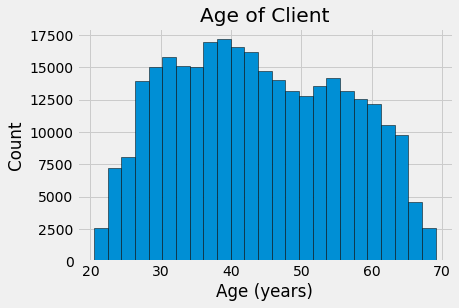

In [117]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(app_train_clean['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

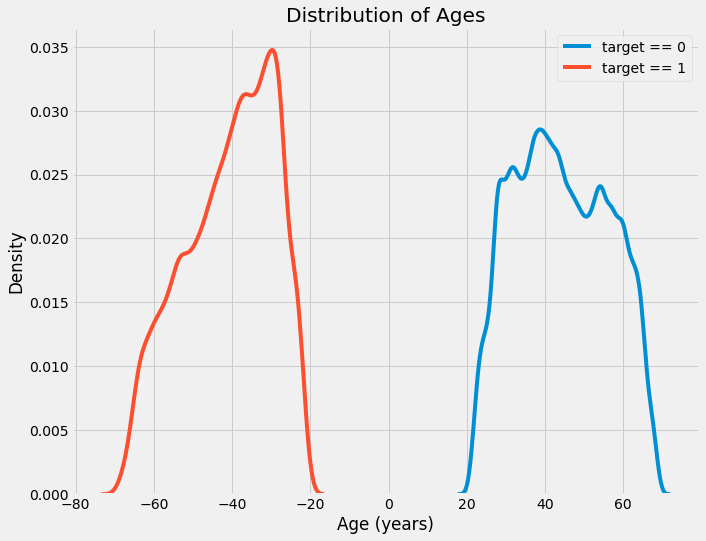

In [118]:
import seaborn as sns
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train_clean.loc[app_train_clean['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train_clean['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');
plt.legend()

The target == 1 curve skews towards the younger end of the range. Although this is not a significant correlation (-0.07 correlation coefficient), this variable is likely going to be useful in a machine learning model because it does affect the target.

In [119]:
# Age information into a separate dataframe
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,-9461,-25.920548,NaN
1,0,-16765,-45.931507,NaN
2,0,-19046,-52.180822,NaN
3,0,-19005,-52.068493,NaN
4,0,-19932,-54.608219,NaN
5,0,-16941,-46.413699,NaN
6,0,-13778,-37.747945,NaN
7,0,-18850,-51.643836,NaN
8,0,-20099,-55.065753,NaN
9,0,-14469,-39.641096,NaN


In [120]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",NaN,NaN,NaN
"(25.0, 30.0]",NaN,NaN,NaN
"(30.0, 35.0]",NaN,NaN,NaN
"(35.0, 40.0]",NaN,NaN,NaN
"(40.0, 45.0]",NaN,NaN,NaN
"(45.0, 50.0]",NaN,NaN,NaN
"(50.0, 55.0]",NaN,NaN,NaN
"(55.0, 60.0]",NaN,NaN,NaN
"(60.0, 65.0]",NaN,NaN,NaN


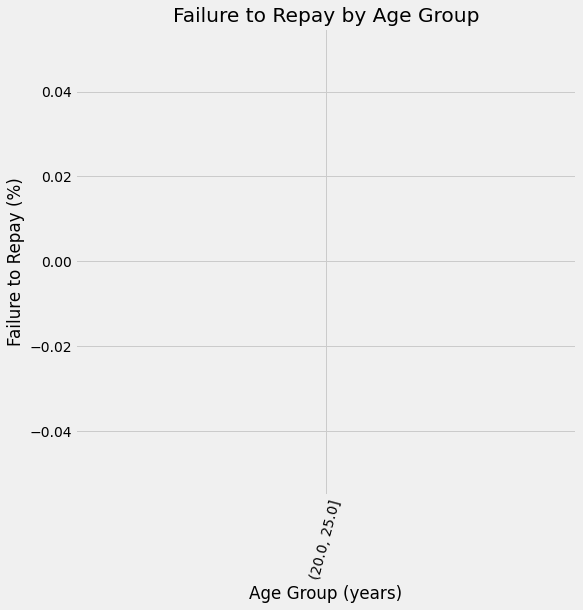

In [121]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

There is a clear trend: younger applicants are more likely to not repay the loan. The rate of failure to repay is above 10% for the youngest three age groups and beolow 5% for the oldest age group.

**This is information that could be directly used by the bank: because younger clients are less likely to repay the loan, maybe they should be provided with more guidance or financial planning tips. This does not mean the bank should discriminate against younger clients, but it would be smart to take precautionary measures to help younger clients pay on time.**



### Exterior Sources

The 3 variables with the strongest negative correlations with the target are EXT_SOURCE_1, EXT_SOURCE_2, and EXT_SOURCE_3. According to the documentation, these features represent a "normalized score from external data source". I'm not sure what this exactly means, but it may be a cumulative sort of credit rating made using numerous sources of data.

Let's take a look at these variables.

First, we can show the correlations of the EXT_SOURCE features with the target and with each other.

In [122]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = app_train_clean[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.064698,-0.159029,-0.119572,-0.078239
EXT_SOURCE_1,-0.064698,1.000000,0.114082,0.040437,-0.059073
EXT_SOURCE_2,-0.159029,0.114082,1.000000,0.096664,0.090487
EXT_SOURCE_3,-0.119572,0.040437,0.096664,1.000000,0.151220
DAYS_BIRTH,-0.078239,-0.059073,0.090487,0.151220,1.000000


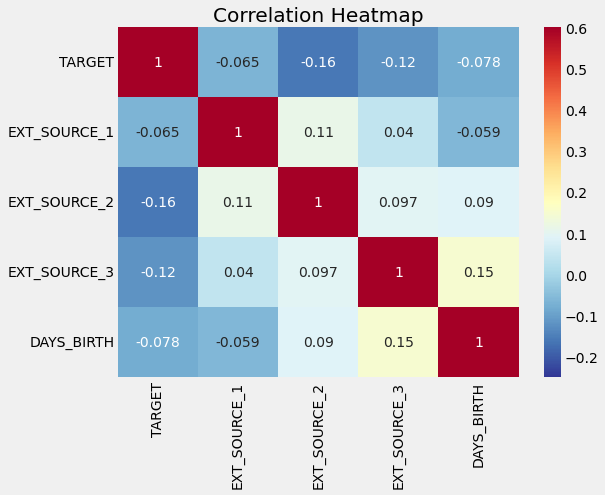

In [123]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

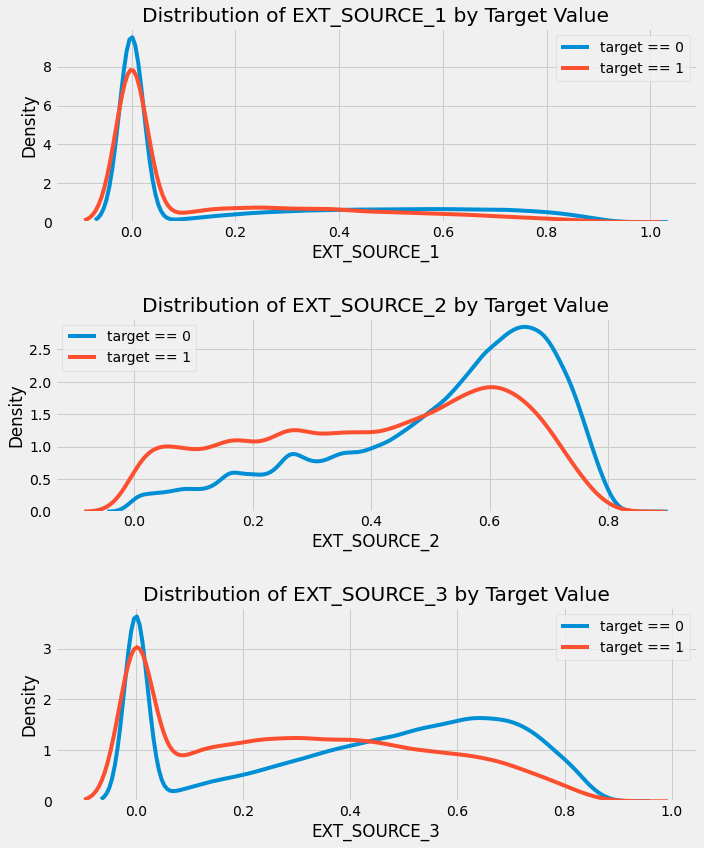

In [124]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train_clean.loc[app_train_clean['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train_clean.loc[app_train_clean['TARGET'] == 1, source], label = 'target == 1')
        
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    plt.tight_layout(h_pad = 2.5)
    plt.legend()

EXT_SOURCE_3 displays the greatest difference between the values of the target. We can clearly see that this feature has some relationship to the likelihood of an applicant to repay a loan. The relationship is not very strong (in fact they are all considered very weak, but these variables will still be useful for a machine learning model to predict whether or not an applicant will repay a loan on time.

### Pairs Plot

Next, make pairs plot of the EXT_SOURCE variables and the DAYS_BIRTH variable. The Pairs Plot is a great exploration tool because it lets us see relationships between multiple pairs of variables as well as distributions of single variables. 

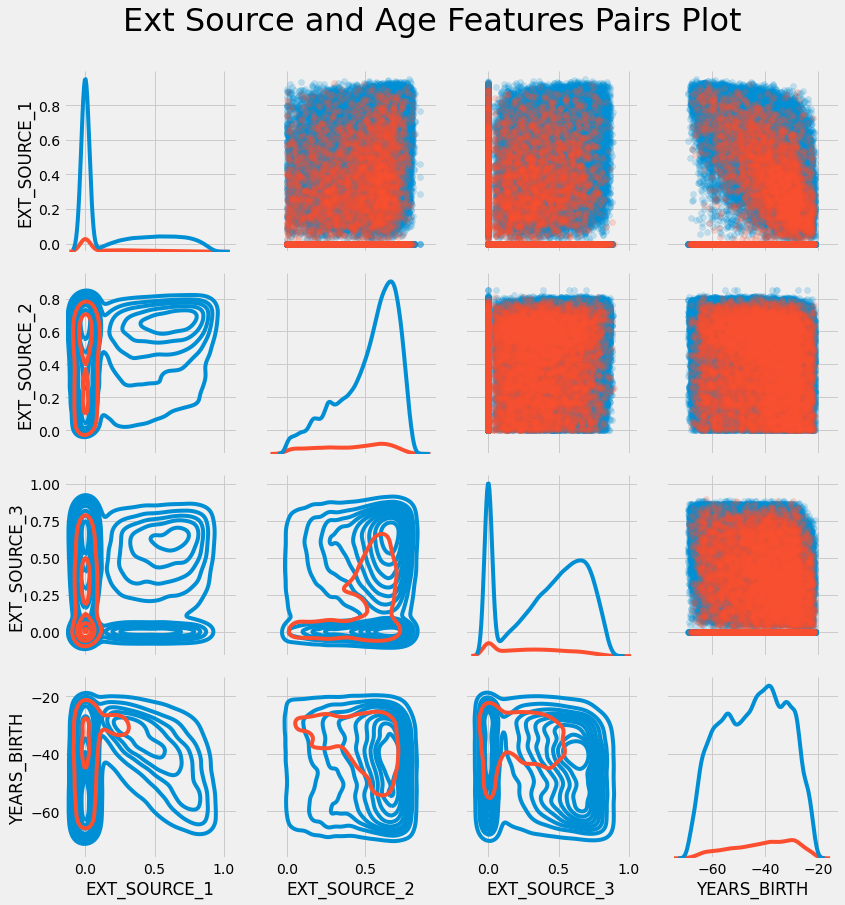

In [125]:
# Copy the data for plotting
plot_data = ext_data.drop(columns = ['DAYS_BIRTH']).copy()

# Add in the age of the client in years
plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']

# Drop na values and limit to first 100000 rows
plot_data = plot_data.dropna().loc[:100000, :]

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)
# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
                    hue = 'TARGET', 
                    vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# Upper is a scatter plot
grid.map_upper(plt.scatter, alpha = 0.2)

# Diagonal is a histogram
grid.map_diag(sns.kdeplot)

# Bottom is density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05);

In this plot, the red indicates loans that were not repaid and the blue are loans that are paid. We can see the different relationships within the data. There does appear to be a moderate positive linear relationship between the EXT_SOURCE_1 and the DAYS_BIRTH (or equivalently YEARS_BIRTH), indicating that this feature may take into account the age of the client.

## Feature Selection

In [126]:
train_ml = app_train_clean.copy()
train_ml.drop(['SK_ID_CURR'], inplace=True, axis=1)

In [127]:
train_ml.dtypes.value_counts()

float16    61
int8       37
object     16
float64     5
int16       2
dtype: int64

In [128]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
label_object = {}
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train_clean:
    if app_train_clean[col].dtype == 'object':
      le.fit(train_ml[col])
      train_ml[col] = le.fit_transform(train_ml[col])
      label_object[col] = le

# Keep track of how many columns were label encoded
      le_count += 1
            
print('%d columns were label encoded.' % le_count)


16 columns were label encoded.


In [129]:
train_ml.dtypes.value_counts()

float16    61
int8       37
int64      16
float64     5
int16       2
dtype: int64

In [130]:
pd.set_option('display.max_columns', None)
train_ml.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,6,7,4,3,1,0.018799,9461,-637.0,-3648.0,-2120,0.0,1,1,0,1,1,0,9,1.0,2,2,6,10,0,0,0,0,0,0,5,0.083008,0.262939,0.139404,0.024704,0.036896,0.972168,0.619141,0.014297,0.000000,0.068970,0.083313,0.125000,0.036896,0.020203,0.018997,0.000000,0.000000,0.025208,0.038300,0.972168,0.634277,0.014397,0.000000,0.068970,0.083313,0.125000,0.037689,0.022003,0.019806,0.0,0.0,0.024994,0.036896,0.972168,0.624512,0.014397,0.000000,0.068970,0.083313,0.125000,0.037506,0.020493,0.019302,0.000000,0.000000,3,1,0.014900,5,0,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,1,4,1,1,1,0.003542,16765,-1188.0,-1186.0,-291,0.0,1,1,0,1,1,0,3,2.0,1,1,1,11,0,0,0,0,0,0,39,0.311279,0.622070,0.000000,0.095886,0.052887,0.984863,0.795898,0.060486,0.080017,0.034485,0.291748,0.333252,0.013000,0.077271,0.054901,0.003901,0.009804,0.092407,0.053802,0.984863,0.804199,0.049713,0.080627,0.034485,0.291748,0.333252,0.012802,0.078979,0.055389,0.0,0.0,0.096802,0.052887,0.984863,0.798828,0.060791,0.080017,0.034485,0.291748,0.333252,0.013199,0.078674,0.055786,0.003901,0.010002,3,1,0.071411,0,0,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,6,7,4,3,1,0.010033,19046,-225.0,-4260.0,-2531,26.0,1,1,1,1,1,0,9,1.0,2,2,1,9,0,0,0,0,0,0,11,0.000000,0.556152,0.729492,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

### Convert Negatie Values to Positive Values

The features that have negative values are DAYS_BIRTH, DAYS_EMPLOYED, DAYS_ID_PUBLISH, DAYS_REGISTRATION, and DAYS_LAST_PHONE_CHANGE

In [131]:
train_ml = train_ml.iloc[:,].abs()

In [132]:
x = train_ml.drop(['TARGET'], axis=1)
y = train_ml['TARGET']

In [133]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# feature selection
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis = 1)
featureScores.columns = ['Features', 'Score']
print('The features that correlate well with target feature:\n')
bestscore = featureScores.sort_values(by=['Score'], ascending=False)
bestscore

The features that correlate well with target feature:



,Features,Score
8,AMT_GOODS_PRICE,1.222709e+08
6,AMT_CREDIT,7.669987e+07
15,DAYS_BIRTH,2.235391e+06
16,DAYS_EMPLOYED,1.775696e+06
5,AMT_INCOME_TOTAL,1.624102e+06
17,DAYS_REGISTRATION,1.348570e+06
93,DAYS_LAST_PHONE_CHANGE,6.656759e+05
18,DAYS_ID_PUBLISH,6.195946e+05
7,AMT_ANNUITY,3.901107e+05
38,ORGANIZATION_TYPE,4.138607e+03


It can be seen which features correlate well with payment difficulties.

* Best features: AMT_GOODS_PRICE, AMT_CREDIT, AND DAYS_BIRTH.
* Worst features: FLAG_MOBIL, FLAG_CONT_MOBILE, and AMT_REQ_CREDIT_BUREAU_HOUR

### Handling Data Imbalance

In [134]:
from sklearn.utils import resample

# create two different dataframe of majority and minority class 
df_majority = train_ml[(train_ml['TARGET']==0)] 
df_minority = train_ml[(train_ml['TARGET']==1)] 

# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 282686, # to match majority class
                                 random_state=65)  # reproducible results

# combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

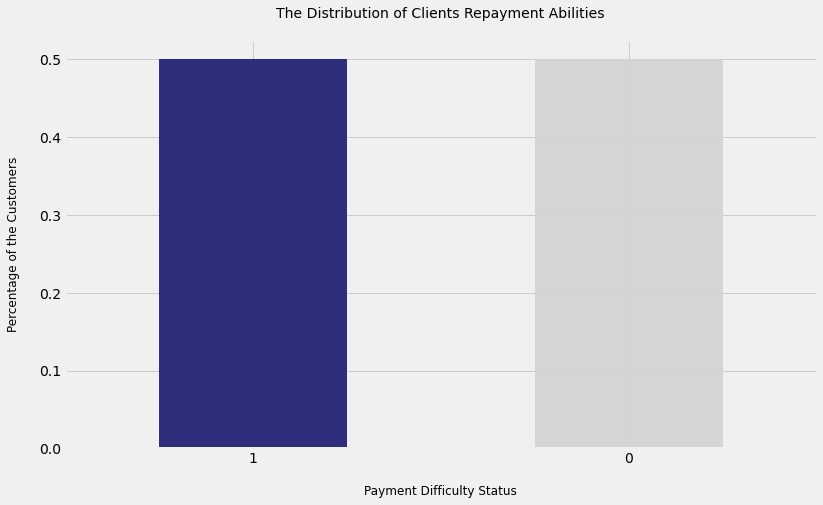

In [135]:
fig = plt.figure(figsize = (12,7))
df_upsampled['TARGET'].value_counts(normalize=True).plot(kind='bar', color= ['midnightblue','lightgrey'], alpha = 0.9, rot=0)
plt.title('The Distribution of Clients Repayment Abilities\n', fontsize=14)
plt.ylabel('Percentage of the Customers\n', fontsize=12)
plt.xlabel('\nPayment Difficulty Status', fontsize=12)
plt.show()

### Data Splitting

In [136]:
bestscore.head(20)['Features'].values

array(['AMT_GOODS_PRICE', 'AMT_CREDIT', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'AMT_INCOME_TOTAL', 'DAYS_REGISTRATION', 'DAYS_LAST_PHONE_CHANGE',
       'DAYS_ID_PUBLISH', 'AMT_ANNUITY', 'ORGANIZATION_TYPE',
       'OCCUPATION_TYPE', 'NAME_INCOME_TYPE', 'EXT_SOURCE_3',
       'REG_CITY_NOT_WORK_CITY', 'CODE_GENDER', 'EXT_SOURCE_2',
       'REG_CITY_NOT_LIVE_CITY', 'FONDKAPREMONT_MODE',
       'NAME_EDUCATION_TYPE', 'EXT_SOURCE_1'], dtype=object)

In [137]:
x_balanced = df_upsampled[['AMT_GOODS_PRICE', 'AMT_CREDIT', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'AMT_INCOME_TOTAL', 'DAYS_REGISTRATION', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'AMT_ANNUITY', 'ORGANIZATION_TYPE', 'OCCUPATION_TYPE', 'NAME_INCOME_TYPE', 'EXT_SOURCE_3', 'REG_CITY_NOT_WORK_CITY', 'CODE_GENDER', 'EXT_SOURCE_2',	 'REG_CITY_NOT_LIVE_CITY', 'FONDKAPREMONT_MODE', 'NAME_EDUCATION_TYPE', 'EXT_SOURCE_1']]
y_balanced = df_upsampled['TARGET']

In [138]:
from sklearn.model_selection import train_test_split 

# splitting tha data
X_train, X_test, y_train, y_test = train_test_split(x_balanced, y_balanced, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(452297, 20) (113075, 20)


## Model Building

Here are some algorithms that will be tested to determine the best model:

* Logistic Regression
* Gaussian Naive Bayes
* Decision Tree
* Random Forest
* K-Nearest Neighbor
* Neural Network

### Logistic Regression

In [139]:
# train the model
log_model = LogisticRegression().fit(X_train, y_train)
print(log_model)

LogisticRegression()


In [140]:
# predict data train
y_train_pred_log = log_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Logistic Regression):')
print(classification_report(y_train, y_train_pred_log))

Classification Report Training Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.57      0.65      0.61    226185
           1       0.59      0.50      0.54    226112

    accuracy                           0.58    452297
   macro avg       0.58      0.58      0.57    452297
weighted avg       0.58      0.58      0.57    452297



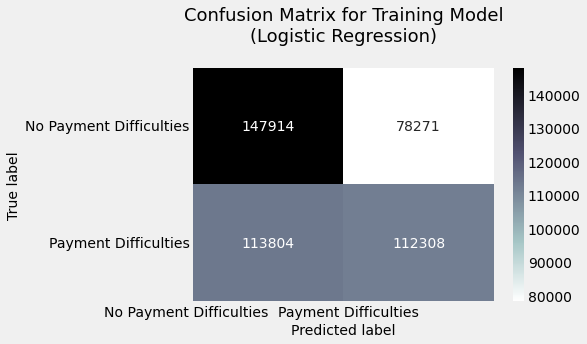

In [141]:
# form confusion matrix as a dataFrame
confusion_matrix_log = pd.DataFrame((confusion_matrix(y_train, y_train_pred_log)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_log, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [142]:
# predict data test
y_test_pred_log = log_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Logistic Regression):')
print(classification_report(y_test, y_test_pred_log))

Classification Report Testing Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.56      0.65      0.61     56501
           1       0.59      0.50      0.54     56574

    accuracy                           0.58    113075
   macro avg       0.58      0.58      0.57    113075
weighted avg       0.58      0.58      0.57    113075



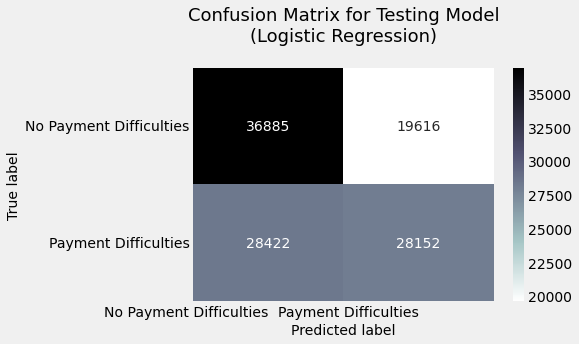

In [143]:
# form confusion matrix as a dataFrame
confusion_matrix_log = pd.DataFrame((confusion_matrix(y_test, y_test_pred_log)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_log, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [144]:
acc_log_train=round(log_model.score(X_train,y_train)*100,2)
acc_log_test=round(log_model.score(X_test,y_test)*100,2)
print('Training Accuracy: %s' % format(acc_log_train), '%')
print('Test Accuracy: %s' % format(acc_log_test), '%')

Training Accuracy: 57.53 %
Test Accuracy: 57.52 %


It can be seen that:

* Logistic regression model gives 57.53% correct results.
* There is 0.01% error margin.

In [145]:
# ROC scores
roc_auc_log = round(roc_auc_score(y_test, y_test_pred_log),4)
print('ROC AUC:', roc_auc_log)

ROC AUC: 0.5752


In [146]:
ml_result = pd.DataFrame(
   {
    "Models": [],
    "Training Accuracy Score": [],
    "Testing Accuracy Score": [],
    "ROC Score" : []
   }
)

In [184]:
acc_log_tr = log_model.score(X_train,y_train)
acc_log_ts = log_model.score(X_test,y_test)

ml_result.loc[0] = ["Logistic Regression" , acc_log_tr, acc_log_ts, roc_auc_log]

### Gaussian Naive Bayes

In [148]:
# train the model
gnb_model = GaussianNB().fit(X_train, y_train)
print(gnb_model)

GaussianNB()


In [149]:
# predict data train
y_train_pred_gnb = gnb_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Gaussian Naive Bayes):')
print(classification_report(y_train, y_train_pred_gnb))

Classification Report Training Model (Gaussian Naive Bayes):
              precision    recall  f1-score   support

           0       0.50      0.96      0.66    226185
           1       0.59      0.06      0.11    226112

    accuracy                           0.51    452297
   macro avg       0.55      0.51      0.38    452297
weighted avg       0.55      0.51      0.38    452297



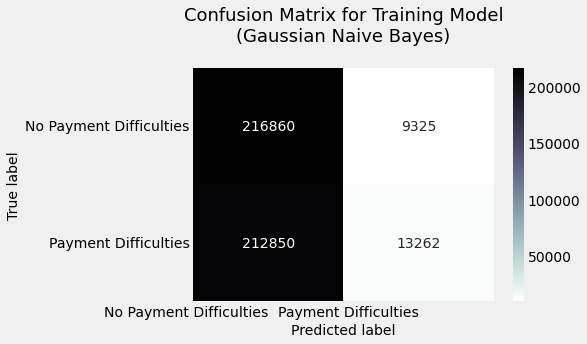

In [150]:
# form confusion matrix as a dataFrame
confusion_matrix_gnb = pd.DataFrame((confusion_matrix(y_train, y_train_pred_gnb)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_gnb, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Gaussian Naive Bayes)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [151]:
# predict data test
y_test_pred_gnb = gnb_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Gaussian Naive Bayes):')
print(classification_report(y_test, y_test_pred_gnb))

Classification Report Testing Model (Gaussian Naive Bayes):
              precision    recall  f1-score   support

           0       0.50      0.96      0.66     56501
           1       0.59      0.06      0.11     56574

    accuracy                           0.51    113075
   macro avg       0.55      0.51      0.39    113075
weighted avg       0.55      0.51      0.39    113075



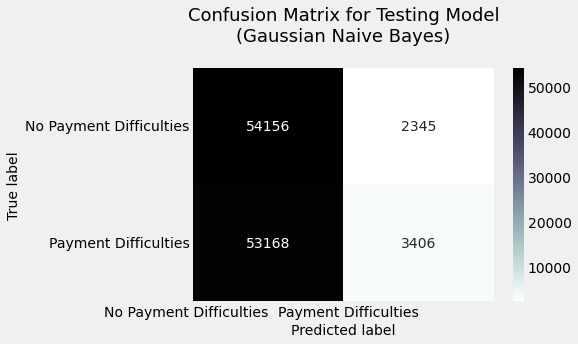

In [152]:
# form confusion matrix as a dataFrame
confusion_matrix_gnb = pd.DataFrame((confusion_matrix(y_test, y_test_pred_gnb)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_gnb, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Gaussian Naive Bayes)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [153]:
acc_nb_train=round(gnb_model.score(X_train,y_train)*100,2)
acc_nb_test=round(gnb_model.score(X_test,y_test)*100,2)
print('Training Accuracy: %s' % format(acc_nb_train), '%')
print('Test Accuracy: %s' % format(acc_nb_test), '%')

Training Accuracy: 50.88 %
Test Accuracy: 50.91 %


It can be seen that:

* Gaussian naive bayes model gives 50.88% correct results.
* There is 0.03% error margin.

In [154]:
# ROC scores
roc_auc_gnb = round(roc_auc_score(y_test, y_test_pred_gnb),4)
print('ROC AUC:', roc_auc_gnb)

ROC AUC: 0.5094


In [155]:
gnb_tr = gnb_model.score(X_train,y_train)
gnb_ts = gnb_model.score(X_test,y_test)

ml_result.loc[1] = ["Gaussian Naive Bayes" , gnb_tr, gnb_ts, roc_auc_gnb]

### Decision Tree

In [156]:
# train the model
dt_model = DecisionTreeClassifier().fit(X_train,y_train)
print(dt_model)

DecisionTreeClassifier()


In [157]:
# predict data train
y_train_pred_dt = dt_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Decision Tree Classifier):')
print(classification_report(y_train, y_train_pred_dt))

Classification Report Training Model (Decision Tree Classifier):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226185
           1       1.00      1.00      1.00    226112

    accuracy                           1.00    452297
   macro avg       1.00      1.00      1.00    452297
weighted avg       1.00      1.00      1.00    452297



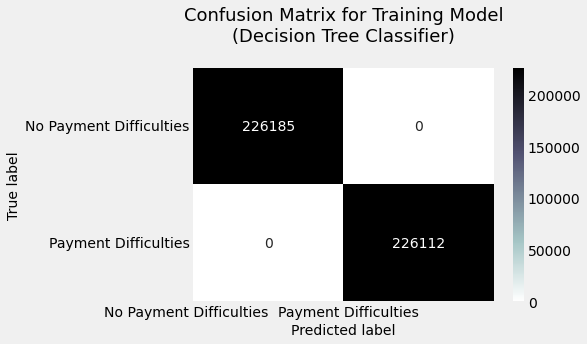

In [158]:
# form confusion matrix as a dataFrame
confusion_matrix_dt = pd.DataFrame((confusion_matrix(y_train, y_train_pred_dt)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_dt, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Decision Tree Classifier)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [159]:
# predict data test
y_test_pred_dt = dt_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Decision Tree Classifier):')
print(classification_report(y_test, y_test_pred_dt))

Classification Report Testing Model (Decision Tree Classifier):
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     56501
           1       0.92      1.00      0.96     56574

    accuracy                           0.95    113075
   macro avg       0.96      0.95      0.95    113075
weighted avg       0.96      0.95      0.95    113075



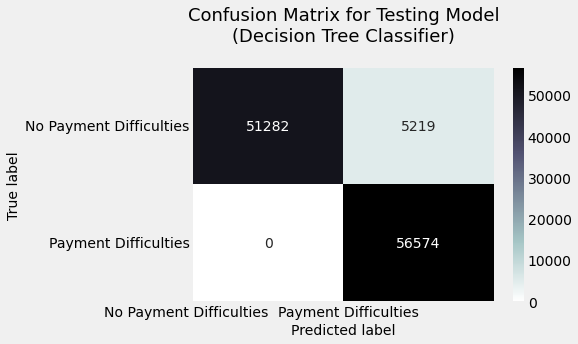

In [160]:
# form confusion matrix as a dataFrame
confusion_matrix_dt = pd.DataFrame((confusion_matrix(y_test, y_test_pred_dt)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_dt, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Decision Tree Classifier)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [161]:
acc_dt_train=round(dt_model.score(X_train,y_train)*100,2)
acc_dt_test=round(dt_model.score(X_test,y_test)*100,2)
print('Training Accuracy: %s' % format(acc_dt_train), '%')
print('Test Accuracy: %s' % format(acc_dt_test), '%')

Training Accuracy: 100.0 %
Test Accuracy: 95.38 %


It can be seen that:

* Decision tree model gives 100% correct results.
* There is 4,59% error margin.

In [162]:
# ROC scores
roc_auc_dt = round(roc_auc_score(y_test, y_test_pred_dt),4)
print('ROC AUC:', roc_auc_dt)

ROC AUC: 0.9538


In [163]:
dt_tr = dt_model.score(X_train,y_train)
dt_ts = dt_model.score(X_test,y_test)

ml_result.loc[2] = ["Decission Tree" , dt_tr, dt_ts, roc_auc_dt]

### Random Forest

In [164]:
# train the model
rf_model = RandomForestClassifier().fit(X_train, y_train)
print(rf_model)

RandomForestClassifier()


In [165]:
# predict data train
y_train_pred_dt = rf_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Decision Tree Classifier):')
print(classification_report(y_train, y_train_pred_dt))

Classification Report Training Model (Decision Tree Classifier):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226185
           1       1.00      1.00      1.00    226112

    accuracy                           1.00    452297
   macro avg       1.00      1.00      1.00    452297
weighted avg       1.00      1.00      1.00    452297



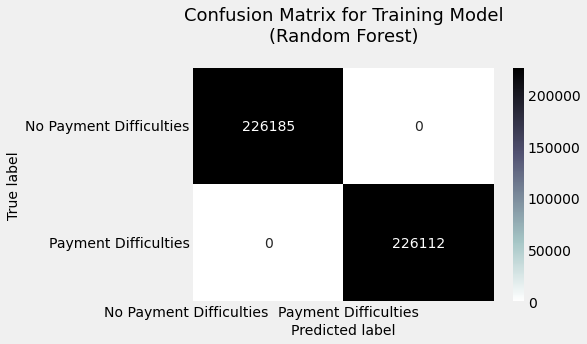

In [166]:
# form confusion matrix as a dataFrame
confusion_matrix_rf = pd.DataFrame((confusion_matrix(y_train, y_train_pred_dt)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_rf, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Random Forest)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [167]:
# predict data test
y_test_pred_rf = rf_model.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report

# print classification report
print('Classification Report Testing Model (Random Forest Classifier):')
print(classification_report(y_test, y_test_pred_rf))

Classification Report Testing Model (Random Forest Classifier):
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56501
           1       0.99      1.00      1.00     56574

    accuracy                           1.00    113075
   macro avg       1.00      1.00      1.00    113075
weighted avg       1.00      1.00      1.00    113075



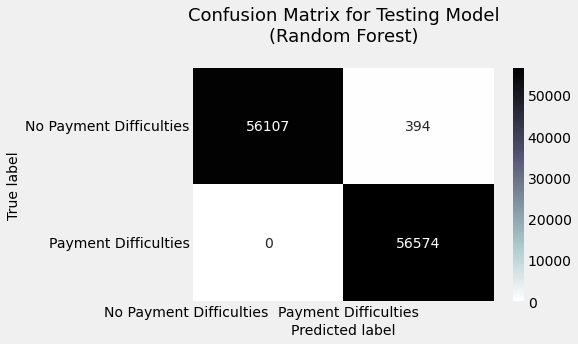

In [168]:
# form confusion matrix as a dataFrame
confusion_matrix_rf = pd.DataFrame((confusion_matrix(y_test, y_test_pred_rf)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_rf, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Random Forest)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [169]:
acc_rf_train=round(rf_model.score(X_train,y_train)*100,2)
acc_rf_test=round(rf_model.score(X_test,y_test)*100,2)
print('Training Accuracy: %s' % format(acc_rf_train), '%')
print('Test Accuracy: %s' % format(acc_rf_test), '%')

Training Accuracy: 100.0 %
Test Accuracy: 99.65 %


It can be seen that:

* Random forest model gives 100% correct results.
* There is 0.33% error margin.

In [170]:
# ROC scores
roc_auc_rf = round(roc_auc_score(y_test, y_test_pred_rf),4)
print('ROC AUC:', roc_auc_rf)

ROC AUC: 0.9965


In [171]:
rf_tr = rf_model.score(X_train,y_train)
rf_ts = rf_model.score(X_test,y_test)

ml_result.loc[3] = ["Random Forest" , rf_tr, rf_ts, roc_auc_rf]

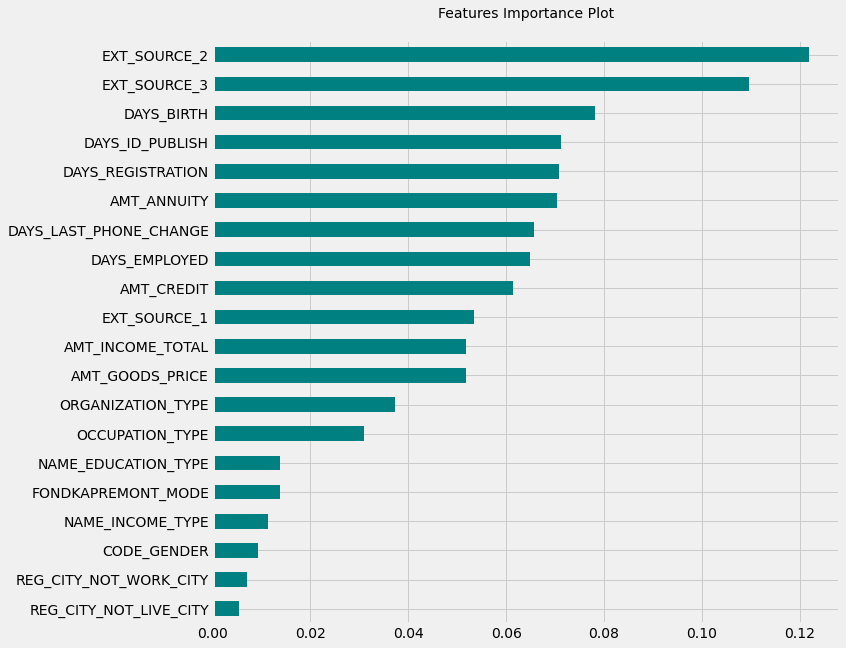

In [172]:
# important features
importances_rf = pd.Series(rf_model.feature_importances_, index=x_balanced.columns).sort_values(ascending=True)

#plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10,10))
fig = importances_rf.plot(kind ='barh', color ='teal')
plt.title('Features Importance Plot\n', fontsize=14)
plt.show()

The plot above confirms that the 5 most important features are EXT_SOURCE_2, EXT_SOURCE_3, DAYS_BIRTH, DAYS_ID_PUBLISH, and DAYS_REGISTRATION

### Neural Network

In [173]:
# train the model
nn_model = MLPClassifier().fit(X_train, y_train)

In [174]:
# predit data train
y_train_pred_nn = nn_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Neural Network):')
print(classification_report(y_train, y_train_pred_nn))

Classification Report Training Model (Neural Network):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00    226185
           1       0.50      1.00      0.67    226112

    accuracy                           0.50    452297
   macro avg       0.25      0.50      0.33    452297
weighted avg       0.25      0.50      0.33    452297



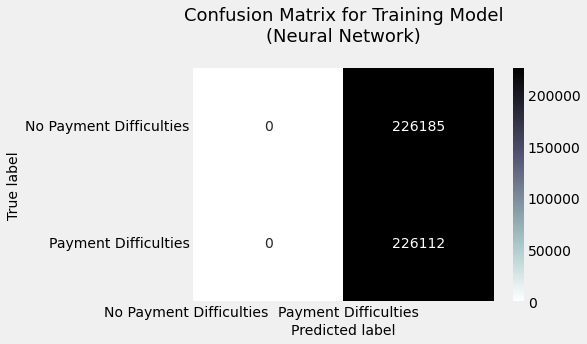

In [175]:
# form confusion matrix as a dataFrame
confusion_matrix_nn = pd.DataFrame((confusion_matrix(y_train, y_train_pred_nn)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_nn, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Neural Network)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [176]:
# predit data test
y_test_pred_nn = nn_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Neural Network):')
print(classification_report(y_test, y_test_pred_nn))

Classification Report Testing Model (Neural Network):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     56501
           1       0.50      1.00      0.67     56574

    accuracy                           0.50    113075
   macro avg       0.25      0.50      0.33    113075
weighted avg       0.25      0.50      0.33    113075



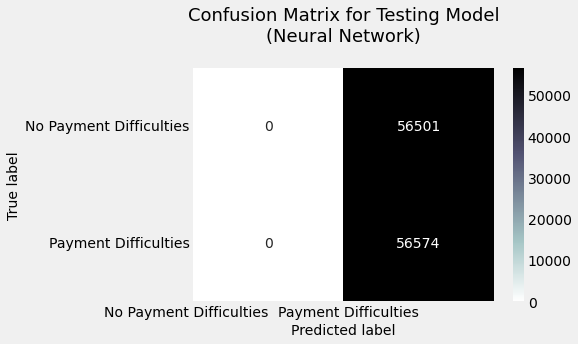

In [177]:
confusion_matrix_nn = pd.DataFrame((confusion_matrix(y_test, y_test_pred_nn)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_nn, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Neural Network)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [178]:
acc_nn_train=round(nn_model.score(X_train,y_train)*100,2)
acc_nn_test=round(nn_model.score(X_test,y_test)*100,2)
print('Training Accuracy: %s' % format(acc_nn_train), '%')
print('Test Accuracy: %s' % format(acc_nn_test), '%')

Training Accuracy: 49.99 %
Test Accuracy: 50.03 %


It can be seen that:

* Neural network model gives 50.01% correct results.
* There is 0.04% error margin.

In [179]:
# ROC scores
roc_auc_nn = round(roc_auc_score(y_test, y_test_pred_nn),4)
print('ROC AUC:', roc_auc_nn)

ROC AUC: 0.5


In [180]:
nn_tr = nn_model.score(X_train,y_train)
nn_ts = nn_model.score(X_test,y_test)

ml_result.loc[4] = ["Neural Network" , nn_tr, nn_ts, roc_auc_nn]

In [185]:
ml_result

,Models,Training Accuracy Score,Testing Accuracy Score,ROC Score
0,Logistic Regression,0.575334,0.575167,0.5752
1,Gaussian Naive Bayes,0.508785,0.50906,0.5094
2,Decission Tree,1.0,0.953845,0.9538
3,Random Forest,1.0,0.996516,0.9965
4,Neural Network,0.499919,0.500323,0.5000


### Model Selection

In [186]:
ml_result.sort_values(by=['Training Accuracy Score', 'Testing Accuracy Score'], ascending=False)

,Models,Training Accuracy Score,Testing Accuracy Score,ROC Score
3,Random Forest,1.0,0.996516,0.9965
2,Decission Tree,1.0,0.953845,0.9538
0,Logistic Regression,0.575334,0.575167,0.5752
1,Gaussian Naive Bayes,0.508785,0.50906,0.5094
4,Neural Network,0.499919,0.500323,0.5000


The prediction accuracy of the train and test data in Random Forest model has a value that is not much different, it can be said that the model is very good, which is there is no underfitting or overfitting. So the Random Forest model was chosen as the best model to predict client’s repayment abilities.

# Prediction

### Import Dataset

In [187]:
test = reduce_memory_usage(pd.read_csv("../content/drive/MyDrive/Virtual Internship - Home Credit/input/application_test.csv"))
print('Number of data points : ',test.shape[0])
print('Number of features : ',test.shape[1])
test.head()

Memory usage of dataframe is 45.00 MB
Memory usage after optimization is: 15.71 MB
Decreased by 65.1%
Number of data points :  48744
Number of features :  121


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018845,-19241,-2329,-5168.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752441,0.789551,0.159546,0.065979,0.058990,0.973145,NaN,NaN,NaN,0.137939,0.125,NaN,NaN,NaN,0.050507,NaN,NaN,0.067200,0.061188,0.973145,NaN,NaN,NaN,0.137939,0.125,NaN,NaN,NaN,0.052612,NaN,NaN,0.066589,0.058990,0.973145,NaN,NaN,NaN,0.137939,0.125,NaN,NaN,NaN,0.051392,NaN,NaN,NaN,block of flats,0.039215,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035797,-18064,-4469,-9120.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564941,0.291748,0.432861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019104,-20038,-4458,-2176.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699707,0.610840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secon

There are total 48,744 rows which contains the information of loans and there are 121 features (without target feature).

### Data Cleaning

In [188]:
app_test_clean = test.copy()
app_test_clean = fill_nulls_outliers(app_test_clean)
app_test_clean.shape

(48744, 121)

### Label Encoding

In [189]:
# Create a label encoder object
label_object = {}
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_test_clean:
    if app_test_clean[col].dtype == 'object':
      le.fit(app_test_clean[col])
      app_test_clean[col] = le.fit_transform(app_test_clean[col])
      label_object[col] = le

# Keep track of how many columns were label encoded
      le_count += 1
            
print('%d columns were label encoded.' % le_count)

16 columns were label encoded.


In [190]:
app_test_clean.dtypes.value_counts()

float16    61
int8       36
int64      17
float64     5
int16       2
dtype: int64

In [191]:
pd.set_option('display.max_columns', None)
app_test_clean.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,0,0,0,1,0,135000.0,568800.0,20560.5,450000.0,6,6,1,1,1,0.018845,-19241,-2329.0,-5168.0,-812,0.0,1,1,0,1,0,1,4,2.0,2,2,5,18,0,0,0,0,0,0,28,0.752441,0.789551,0.159546,0.065979,0.058990,0.973145,0.000000,0.000000,0.000000,0.137939,0.125,0.000000,0.000000,0.000000,0.050507,0.000000,0.000000,0.067200,0.061188,0.973145,0.000000,0.000000,0.000000,0.137939,0.125,0.000000,0.000000,0.000000,0.052612,0.00000,0.000000,0.066589,0.058990,0.973145,0.000000,0.00000,0.000000,0.137939,0.125,0.000000,0.000000,0.000000,0.051392,0.000000,0.000000,0,1,0.039215,5,0,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,0,1,0,1,0,99000.0,222768.0,17370.0,180000.0,6,6,4,1,1,0.035797,-18064,-4469.0,-9120.0,-1623,0.0,1,1,0,1,0,0,10,2.0,2,2,0,9,0,0,0,0,0,0,42,0.564941,0.291748,0.432861,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.000000,3,0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,0,1,1,1,0,202500.0,663264.0,69777.0,630000.0,6,6,1,1,1,0.019104,-20038,-4458.0,-2176.0,-3503,5.0,1,1,0,1,0,0,5,2.0,2,2,1,14,0,0,0,0,0,0,54,0.000000,0.699707,0.610840,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.

### Convert Negative Values to Positive Values

In [192]:
app_test_clean = app_test_clean.iloc[:,].abs()

## Prediction

In [193]:
pred_test = app_test_clean[['AMT_GOODS_PRICE', 'AMT_CREDIT', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'AMT_INCOME_TOTAL', 'DAYS_REGISTRATION', 'DAYS_LAST_PHONE_CHANGE',
       'DAYS_ID_PUBLISH', 'AMT_ANNUITY', 'ORGANIZATION_TYPE',
       'OCCUPATION_TYPE', 'NAME_INCOME_TYPE', 'EXT_SOURCE_3',
       'REG_CITY_NOT_WORK_CITY', 'CODE_GENDER', 'EXT_SOURCE_2',
       'REG_CITY_NOT_LIVE_CITY', 'FONDKAPREMONT_MODE',
       'NAME_EDUCATION_TYPE', 'EXT_SOURCE_1']]
pred_test.head()

,AMT_GOODS_PRICE,AMT_CREDIT,DAYS_BIRTH,DAYS_EMPLOYED,AMT_INCOME_TOTAL,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,AMT_ANNUITY,ORGANIZATION_TYPE,OCCUPATION_TYPE,NAME_INCOME_TYPE,EXT_SOURCE_3,REG_CITY_NOT_WORK_CITY,CODE_GENDER,EXT_SOURCE_2,REG_CITY_NOT_LIVE_CITY,FONDKAPREMONT_MODE,NAME_EDUCATION_TYPE,EXT_SOURCE_1
0,450000.0,568800.0,19241,2329.0,135000.0,5168.0,1740.0,812,20560.5,28,4,6,0.159546,0,0,0.789551,0,0,1,0.752441
1,180000.0,222768.0,18064,4469.0,99000.0,9120.0,0.0,1623,17370.0,42,10,6,0.432861,0,1,0.291748,0,0,4,0.564941
2,630000.0,663264.0,20038,4458.0,202500.0,2176.0,856.0,3503,69777.0,54,5,6,0.610840,0,1,0.699707,0,0,1,0.000000
3,1575000.0,1575000.0,13976,1866.0,315000.0,2000.0,1805.0,4208,49018.5,5,15,6,0.612793,0,0,0.509766,0,3,4,0.525879
4,625500.0,625500.0,13040,2191.0,180000.0,4000.0,821.0,4262,32067.0,5,4,6,0.000000,1,1,0.425781,0,0,4,0.202148


In [194]:
predict = pd.Series(rf_model.predict(pred_test), name = "TARGET").astype(int)
results = pd.concat([app_test_clean['SK_ID_CURR'], predict],axis = 1)
results.to_csv("predict application.csv", index = False)
results.head()

,SK_ID_CURR,TARGET
0,100001,0
1,100005,0
2,100013,0
3,100028,0
4,100038,0


## Recommendation

* Accountants are most capable of repaying the loans (95% of applications approved). But, there is only 3.19% of applications come form accountant. Also for client who work as HR staff and IT staff, they are capable of repaying the loans, but they are the most least customer.
* A client with an income type of student and businessman can be said to be a client who is capable of repaying the loans (100% of applications approved). But there is only 0.005% and 0.003% of applications come from student and businessman.
* Clients who have no payment difficulties are clients in the range of 35-45 years.